In [1]:
import sys
import os

root_path = os.path.abspath('..')
if root_path not in sys.path:
    sys.path.insert(0, root_path)
    
functions_path = os.path.abspath('../Functions')
data_path = os.path.abspath('../Data')
algorithms_path = os.path.abspath('../Algorithms')

sys.path.append(functions_path)
sys.path.append(data_path)
sys.path.append(algorithms_path)

import numpy as np
import pandas as pd
import ruptures as rpt
import matplotlib.pyplot as plt
import random
import time
from Functions.metrics import f_measure, covering
from Functions.coverage import calculate_coverage_score

In [4]:
# Function to process, plot, and evaluate each PID
def process_plot_evaluate_pid_random(pid_df, pid):
    rwrist_y = pid_df["RWrist_Y"].to_numpy()
    frame_peaks = pid_df["frame_peaks"].to_numpy()
    true_cps = [i for i, peak in enumerate(frame_peaks) if peak == 1]

    start_time = time.time()
    n_cps = len(true_cps)
    detected_cps = [random.randint(0, rwrist_y.shape[0]) for _ in range(n_cps)]
    end_time = time.time()
    elapsed_time = end_time - start_time
        
    f1_score, precision, recall = f_measure({1: true_cps}, detected_cps, margin=int(rwrist_y.shape[0] * 0.01), return_PR=True)
    covering_score = covering({1: true_cps}, detected_cps, rwrist_y.shape[0])

    dataset = pid_df.copy()
    
    plt.figure(figsize=(15, 6))
    plt.plot(rwrist_y, label=f'Time Series Data for {pid}')
    for cp in detected_cps:
        plt.axvline(x=cp, color='red', linestyle='--', linewidth=1, label='Detected Change Point' if cp == detected_cps[0] else "")
    for cp in true_cps:
        plt.axvline(x=cp, color='green', linestyle='-', linewidth=1, label='True Change Point' if cp == true_cps[0] else "")
    plt.xlabel('Time')
    plt.ylabel('RWrist_Y Value')
    plt.title(f'PID {pid} - Time: {elapsed_time:.4f}s, F1: {f1_score:.6f}, Cover: {covering_score:.6f}, Precision: {precision:.6f}, Recall: {recall:.6f}')
    plt.legend()
    plt.show()

    return dataset, true_cps, detected_cps, f1_score, covering_score, elapsed_time, precision, recall

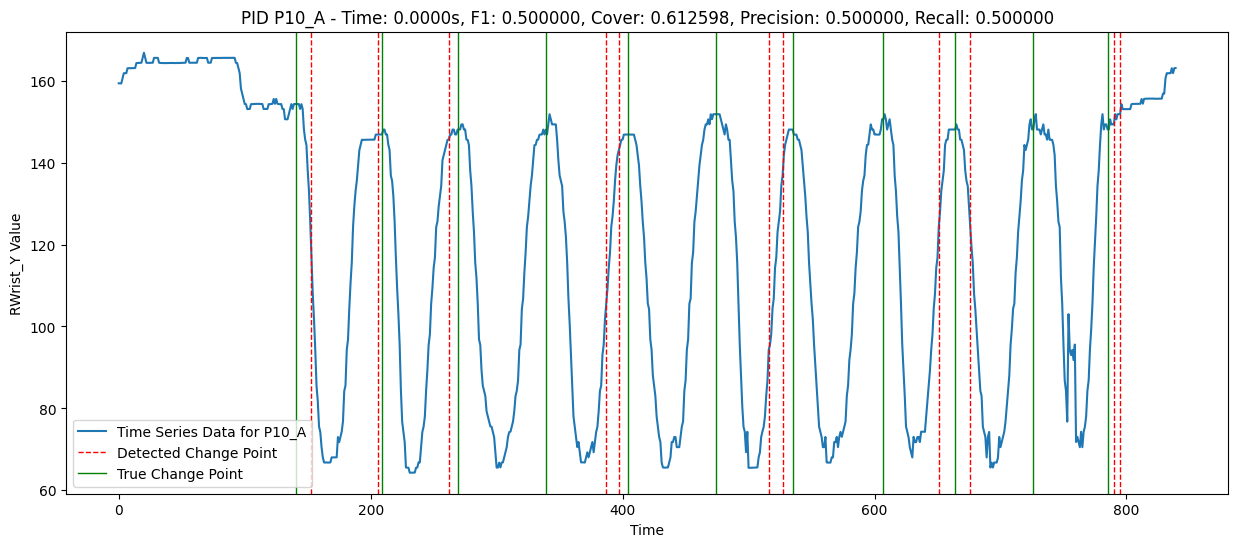

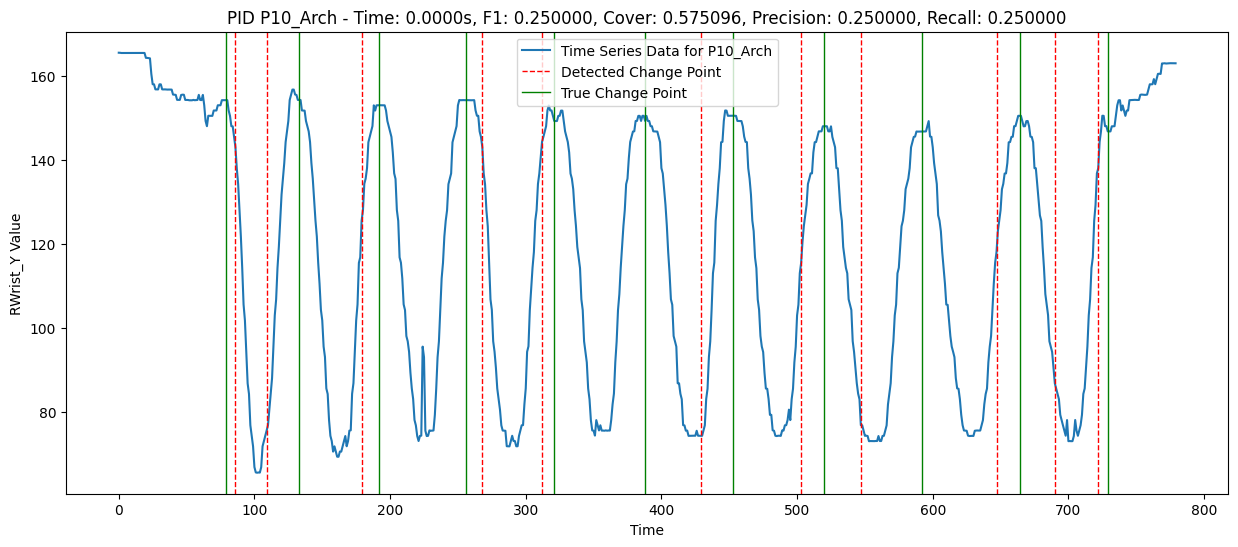

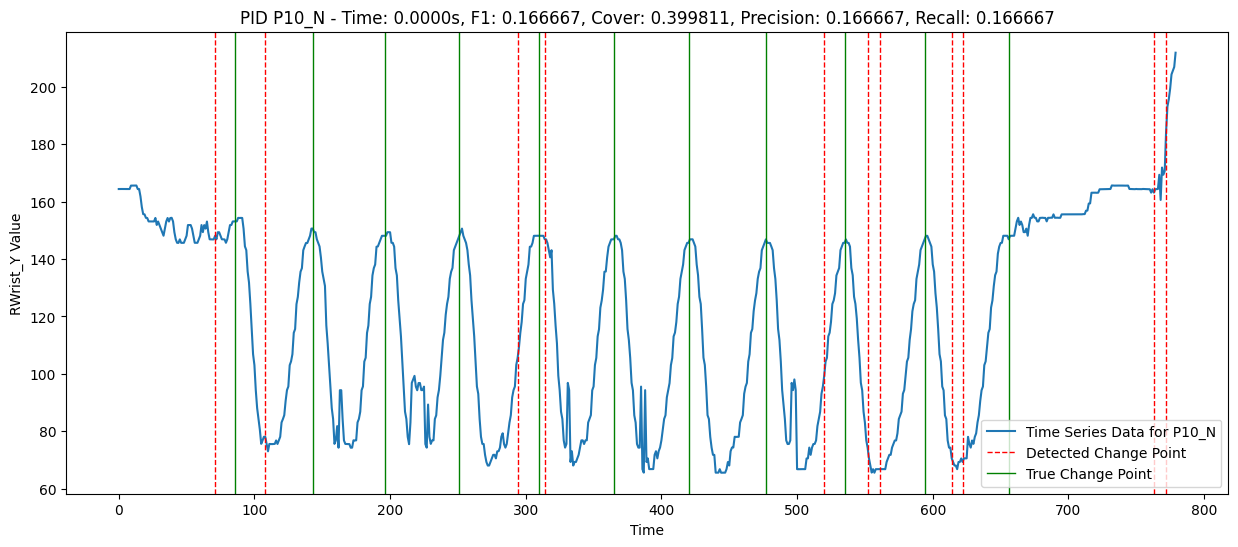

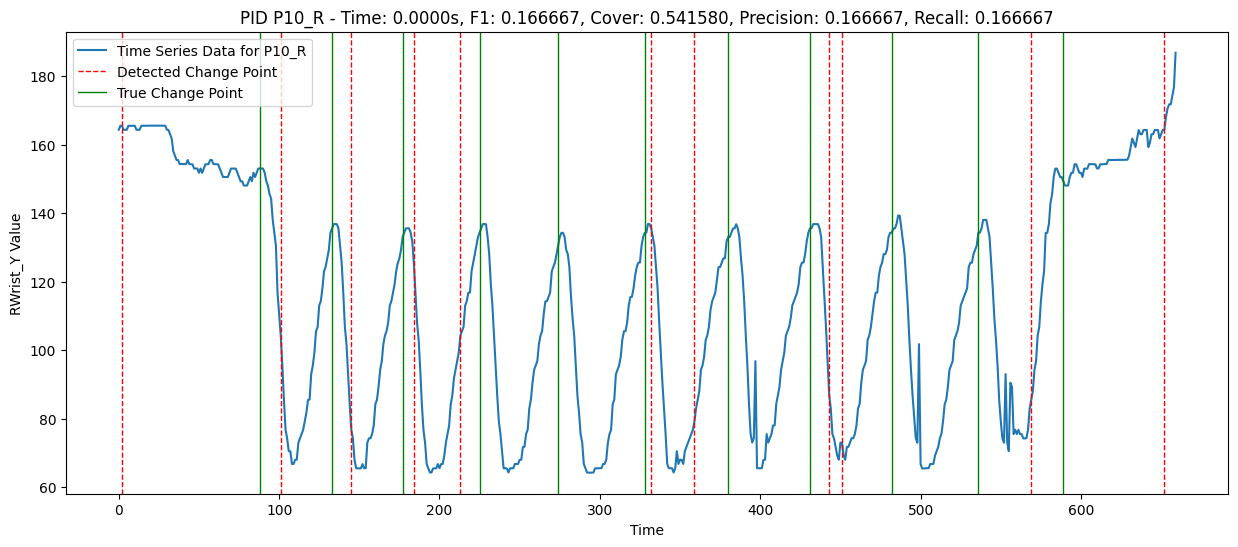

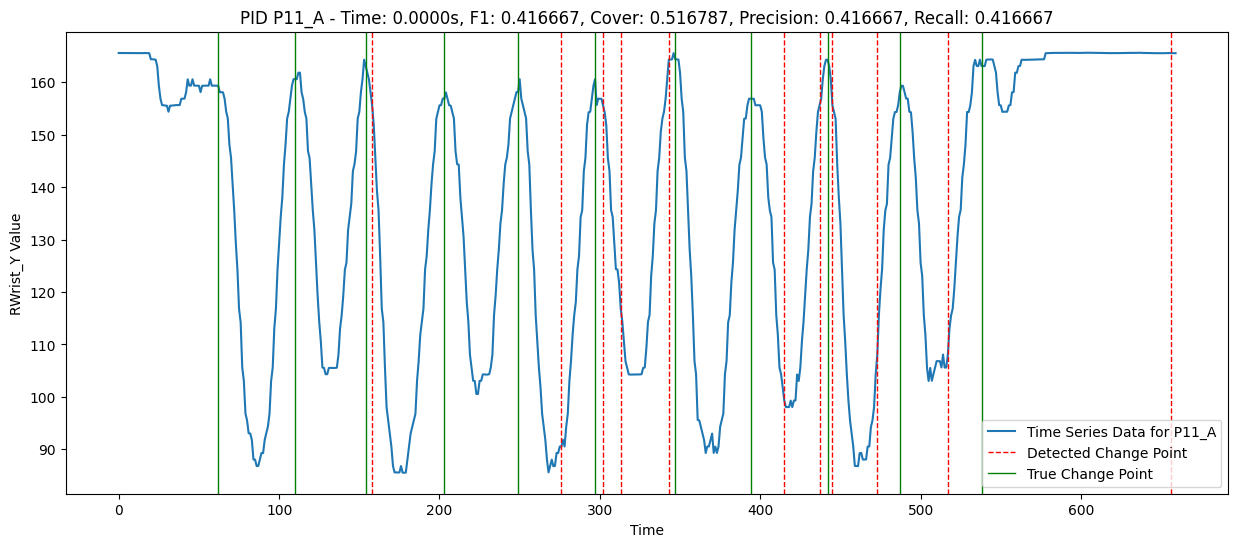

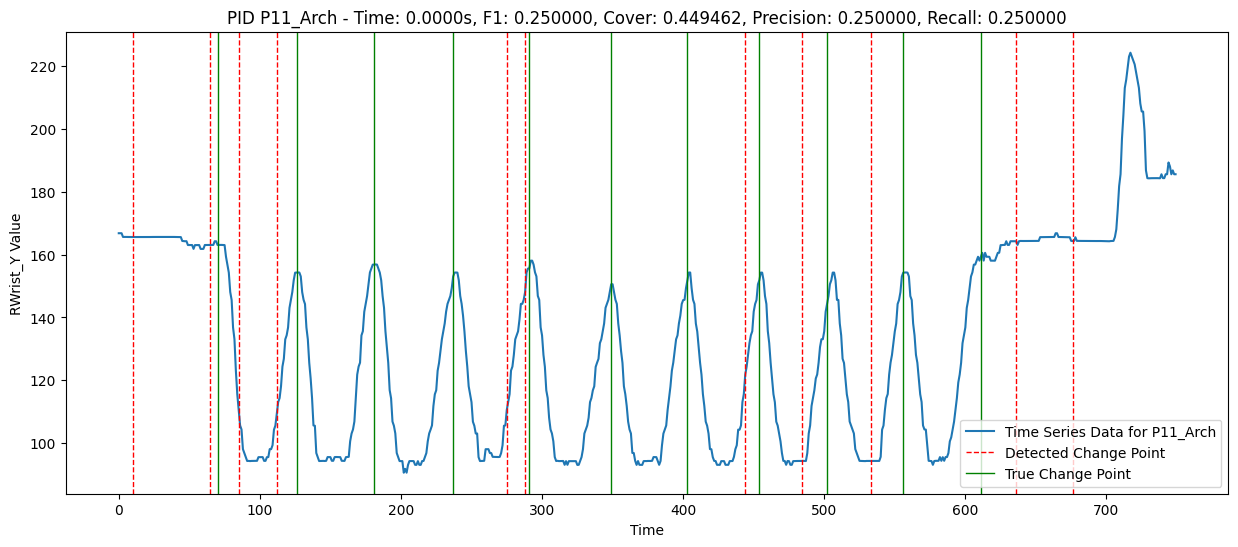

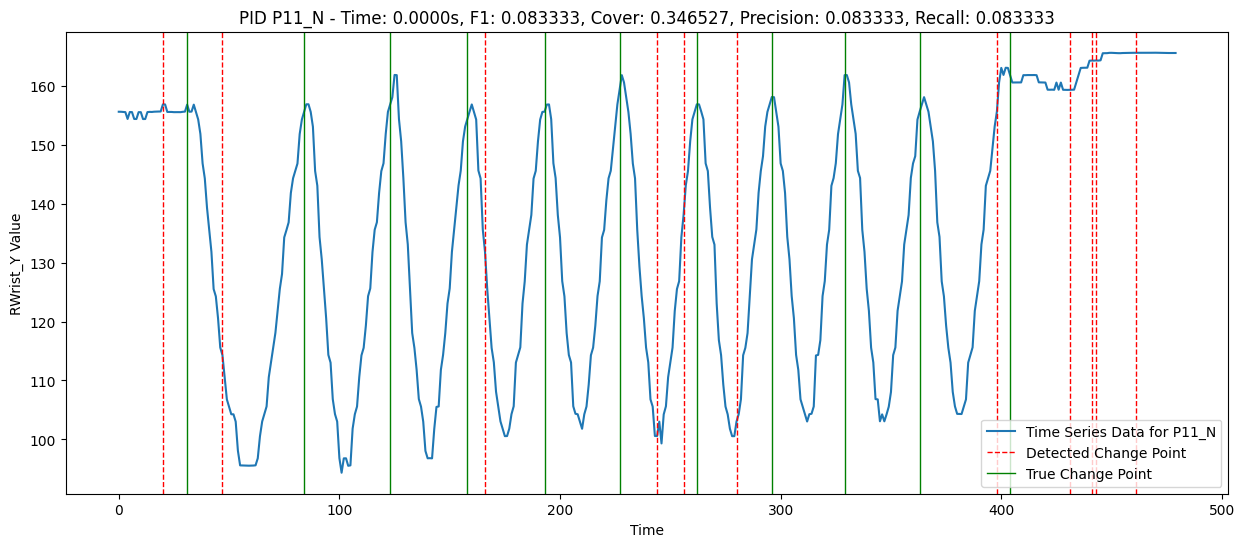

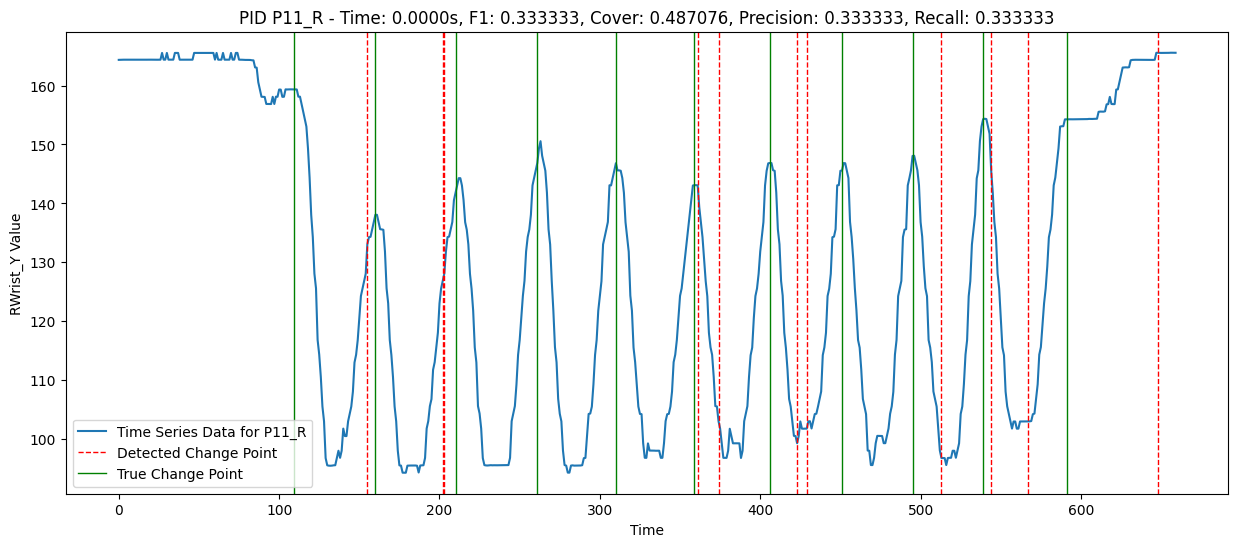

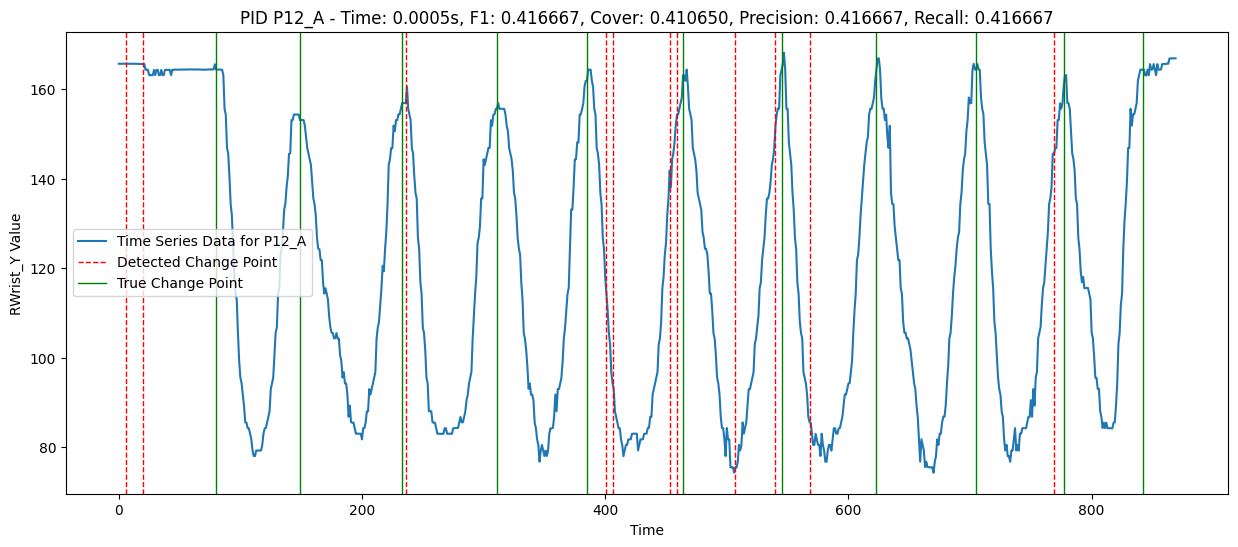

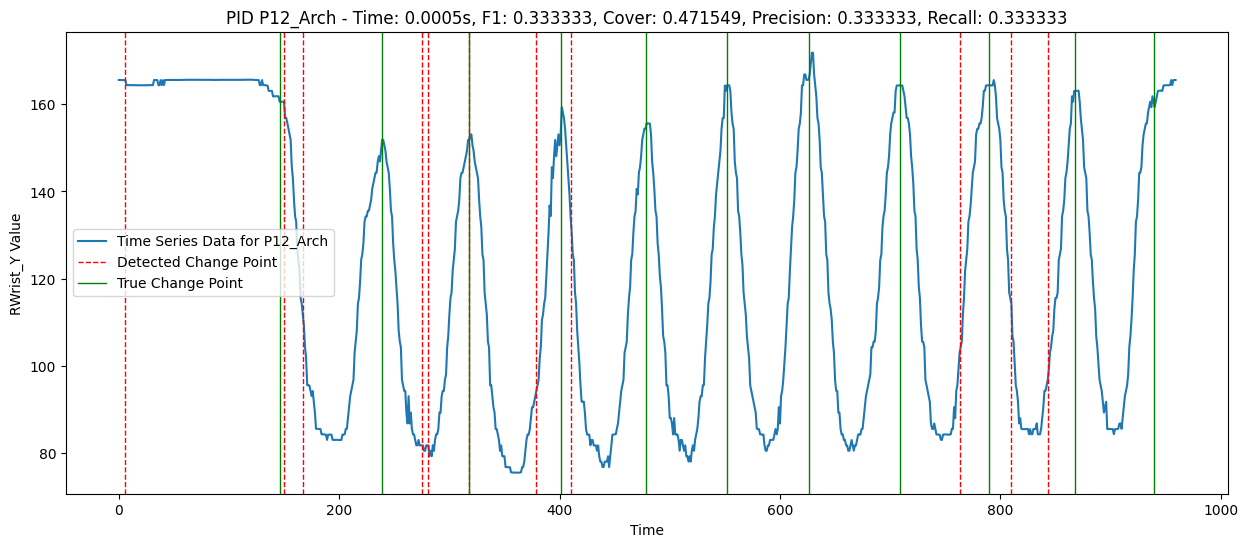

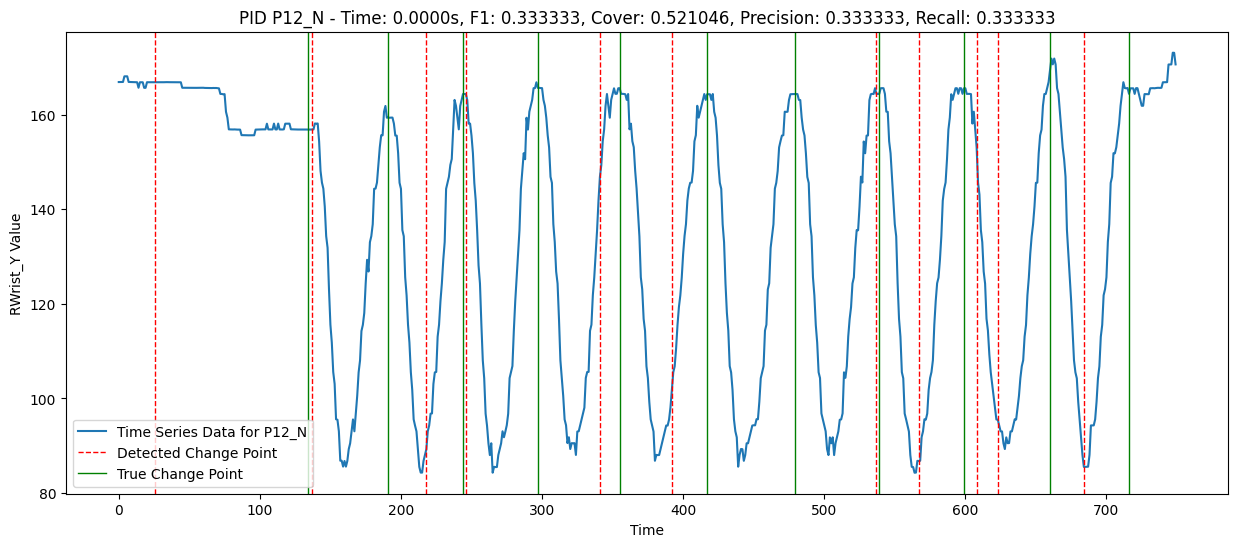

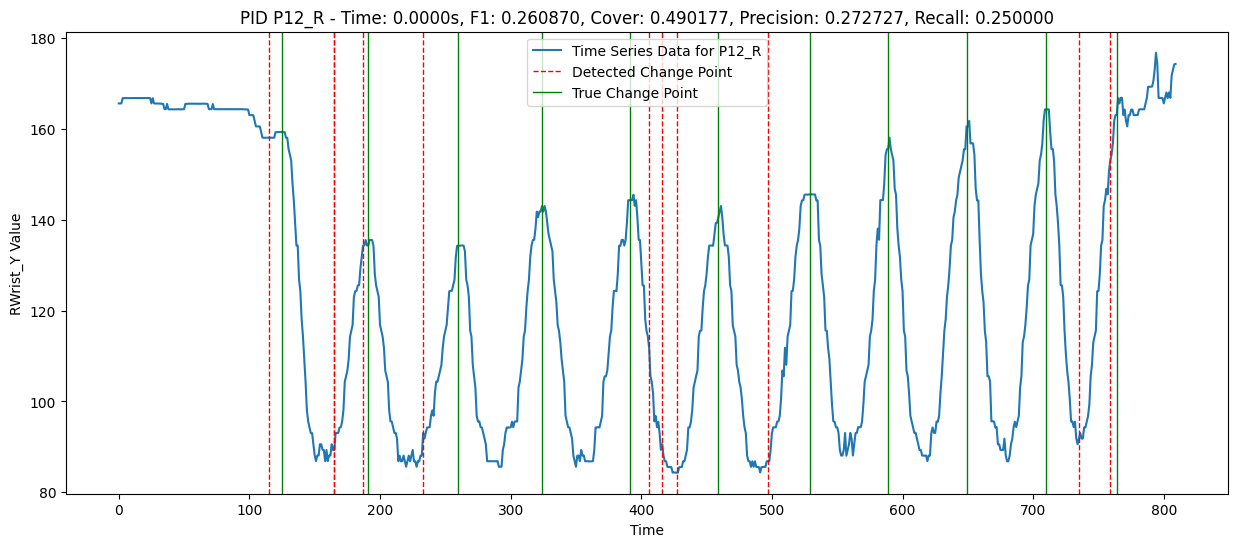

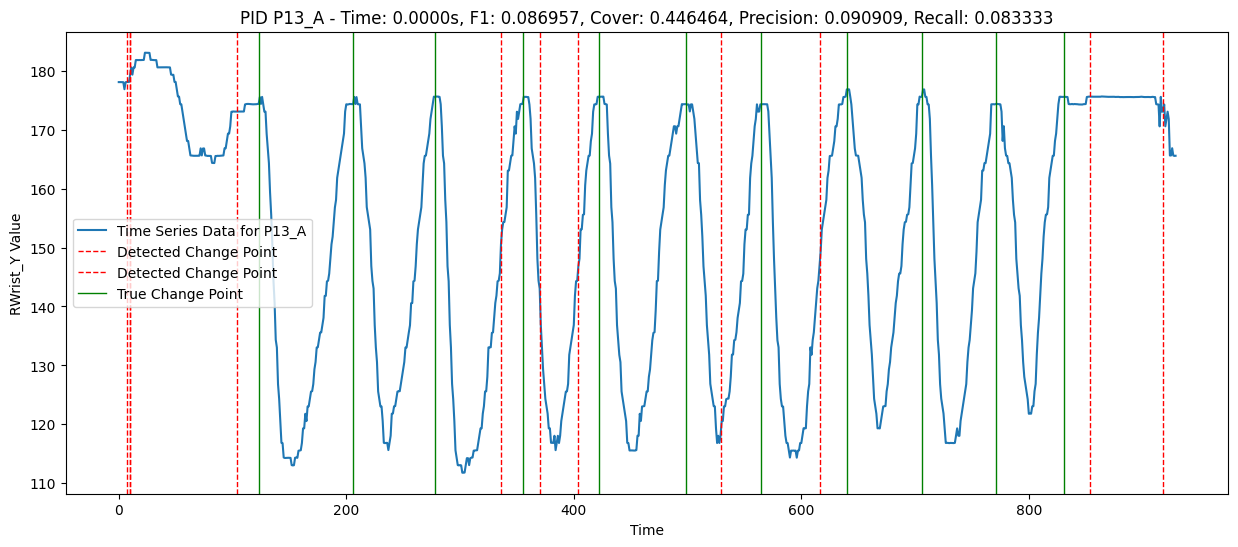

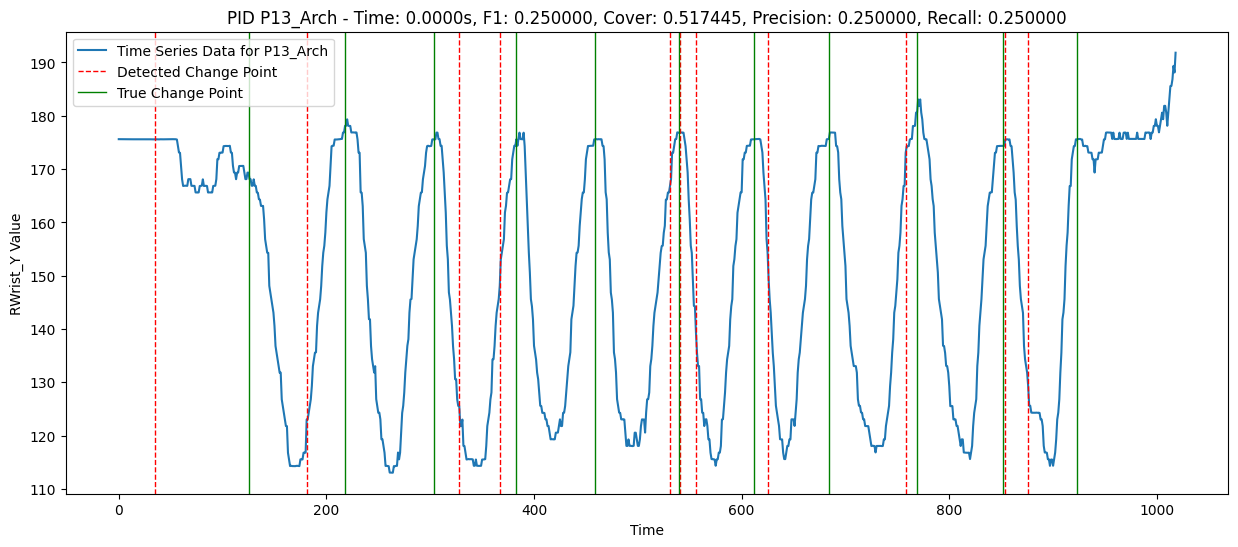

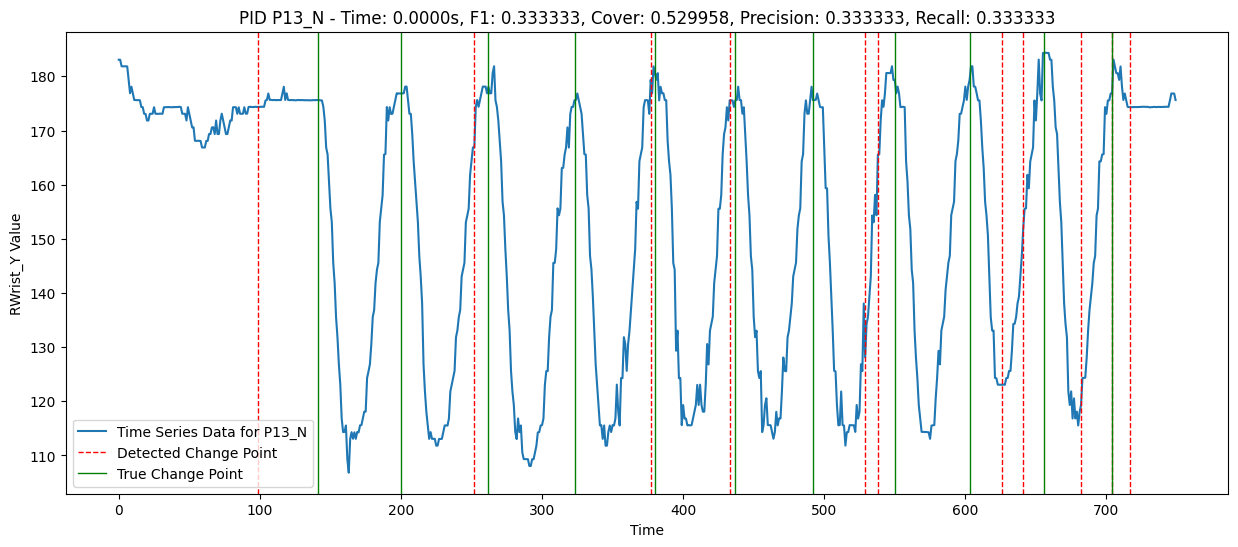

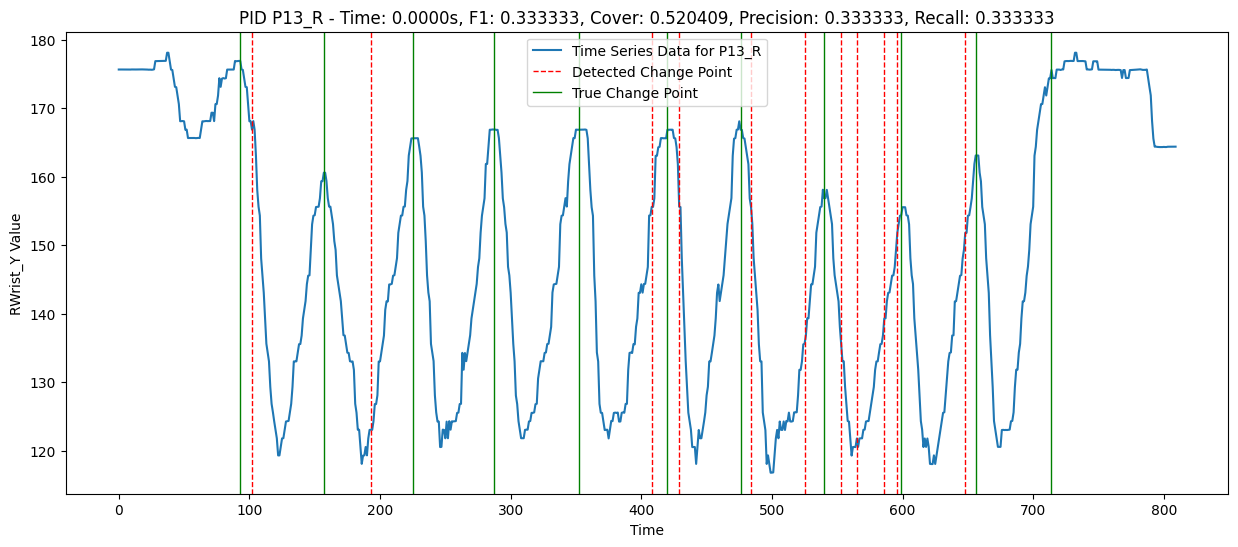

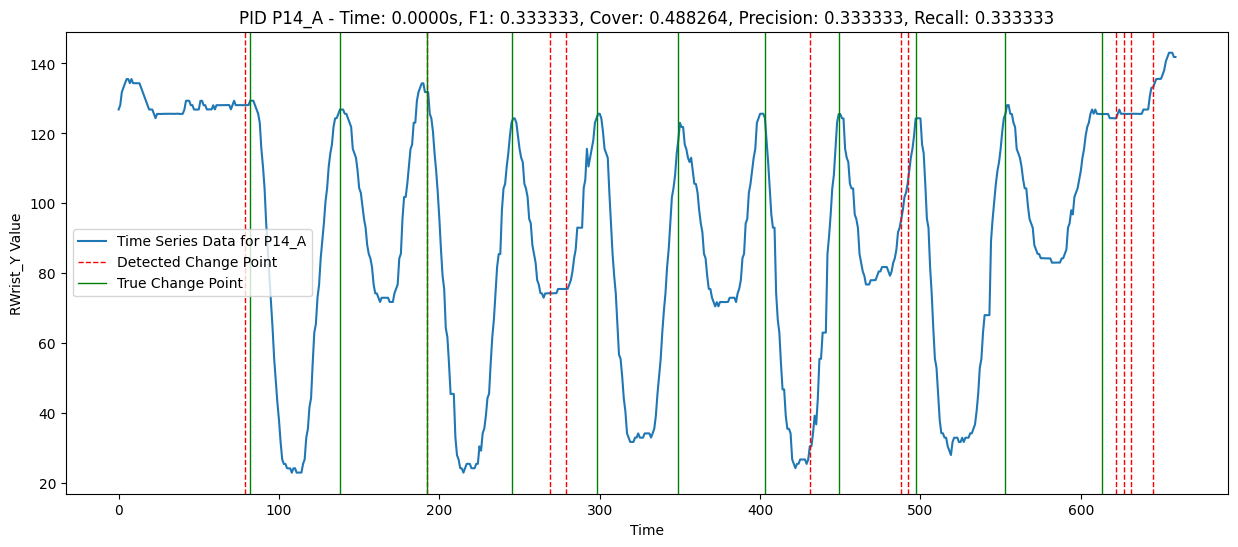

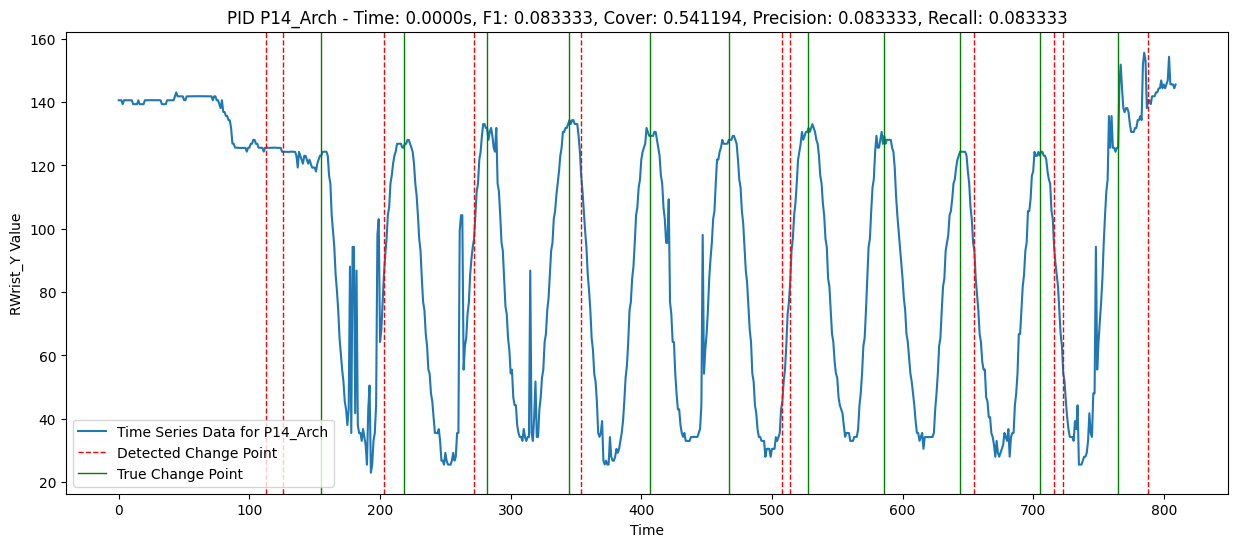

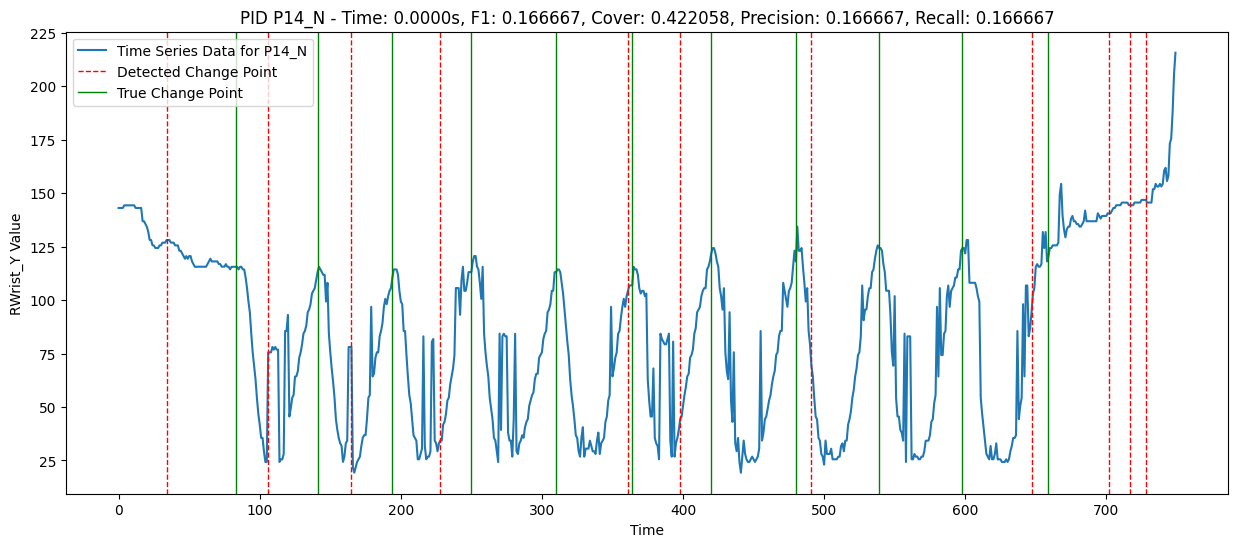

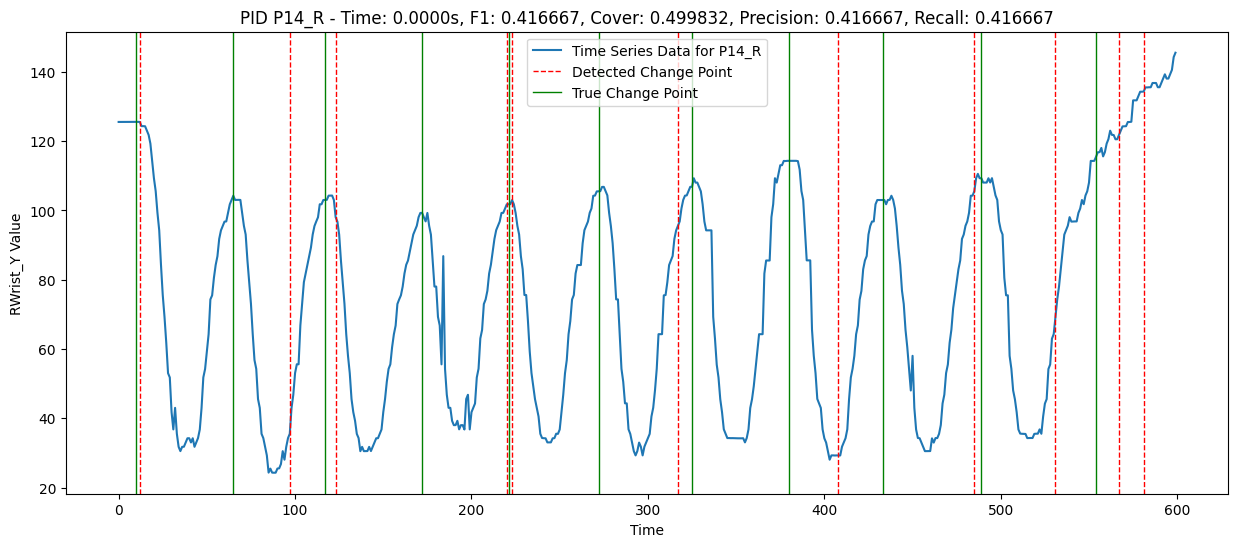

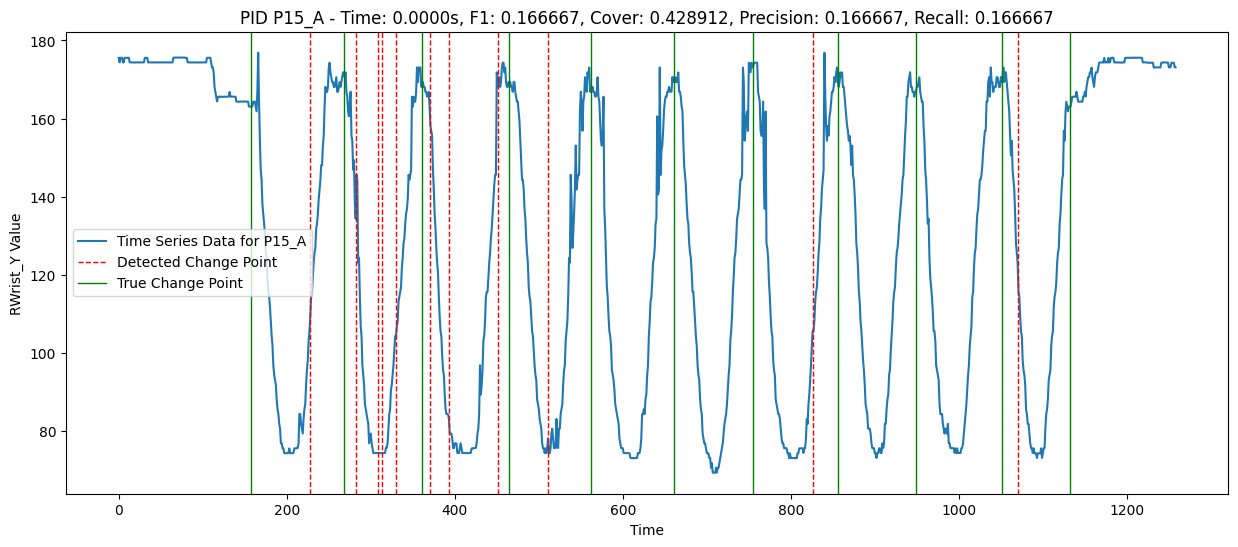

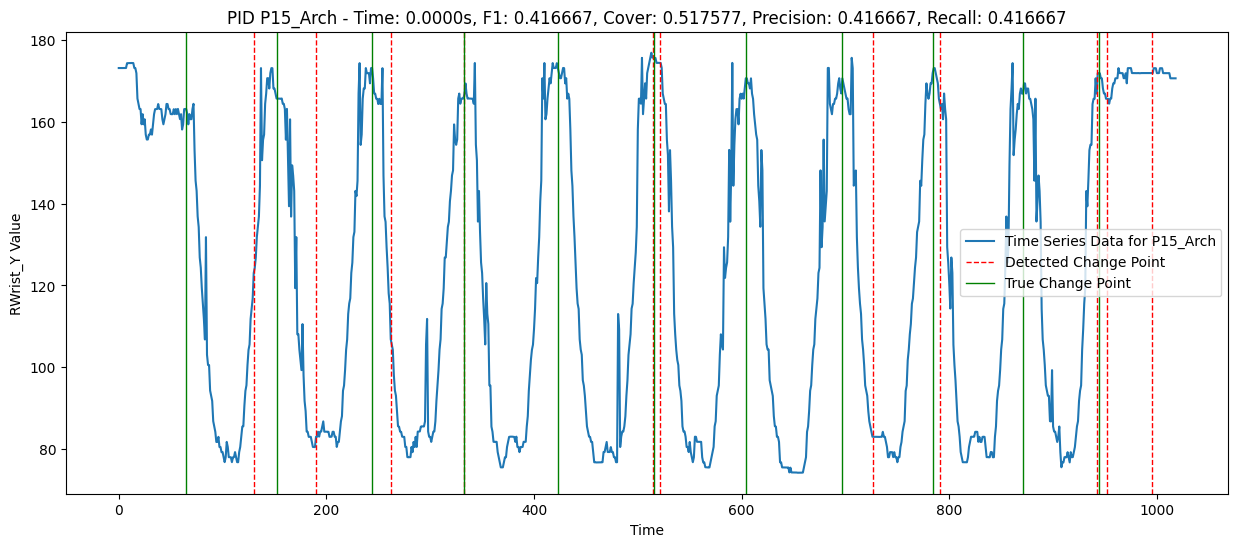

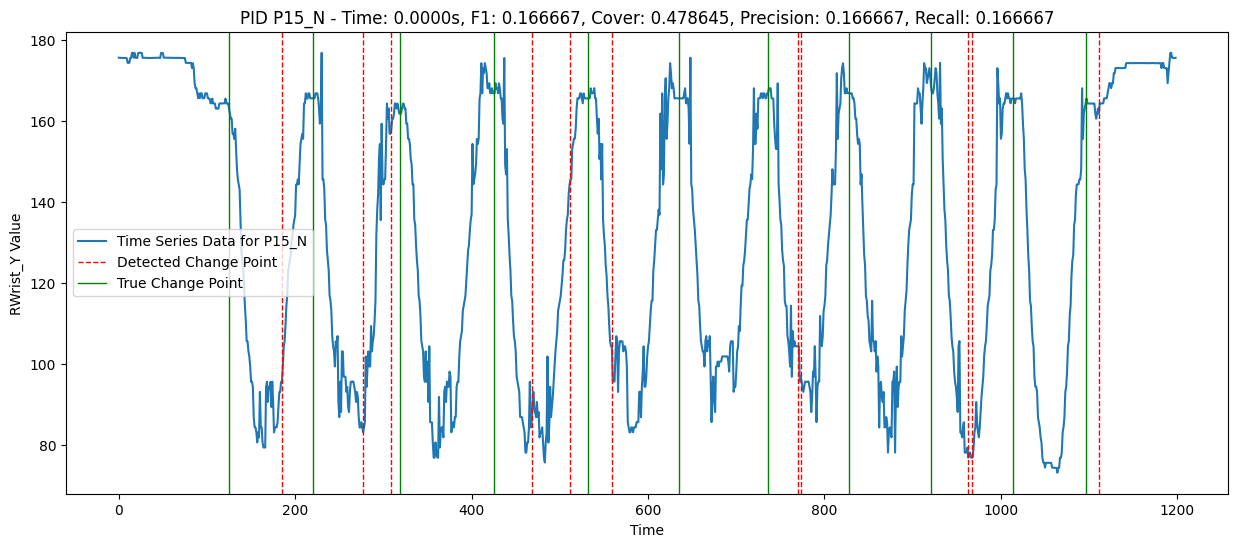

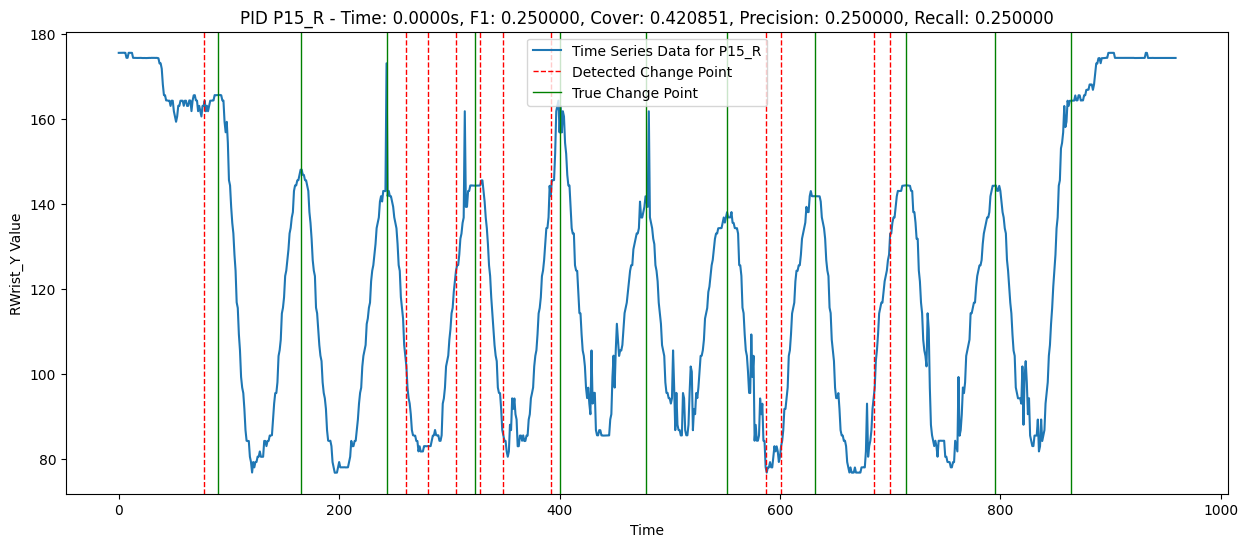

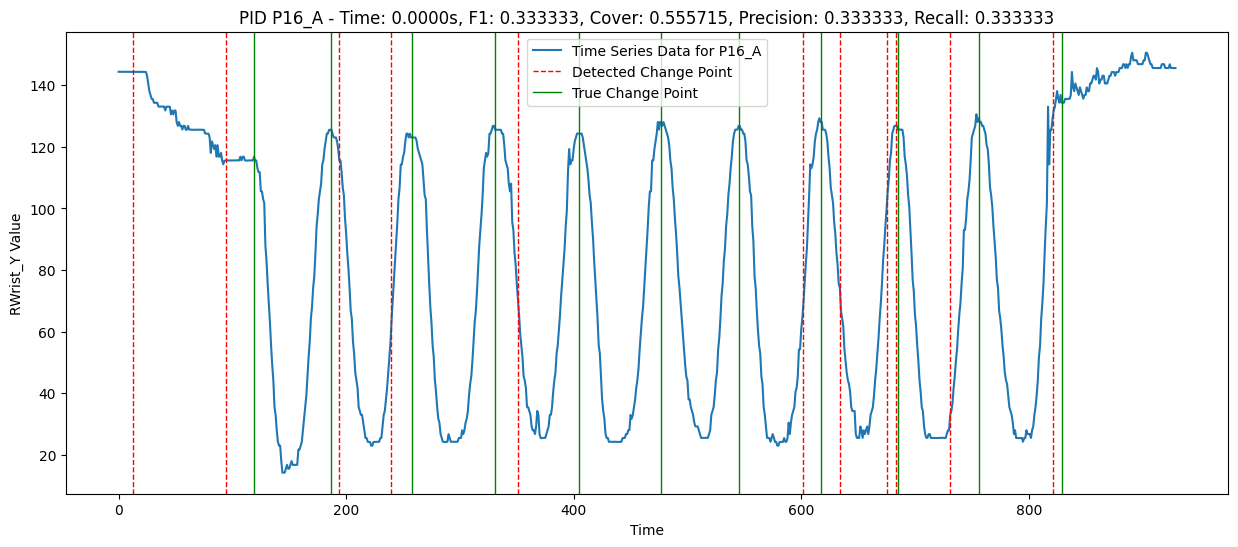

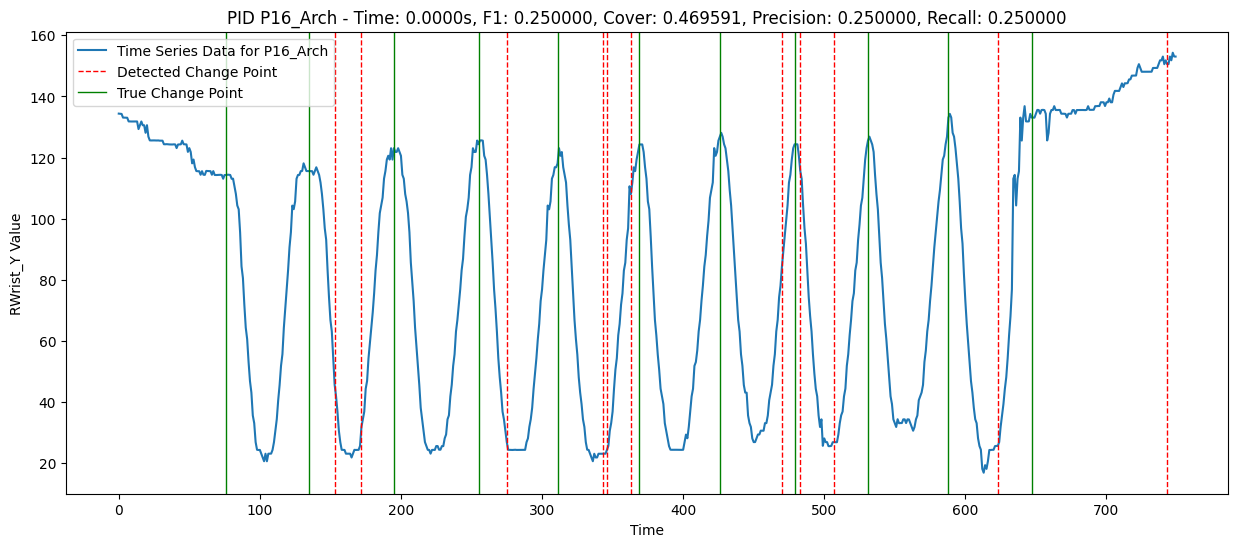

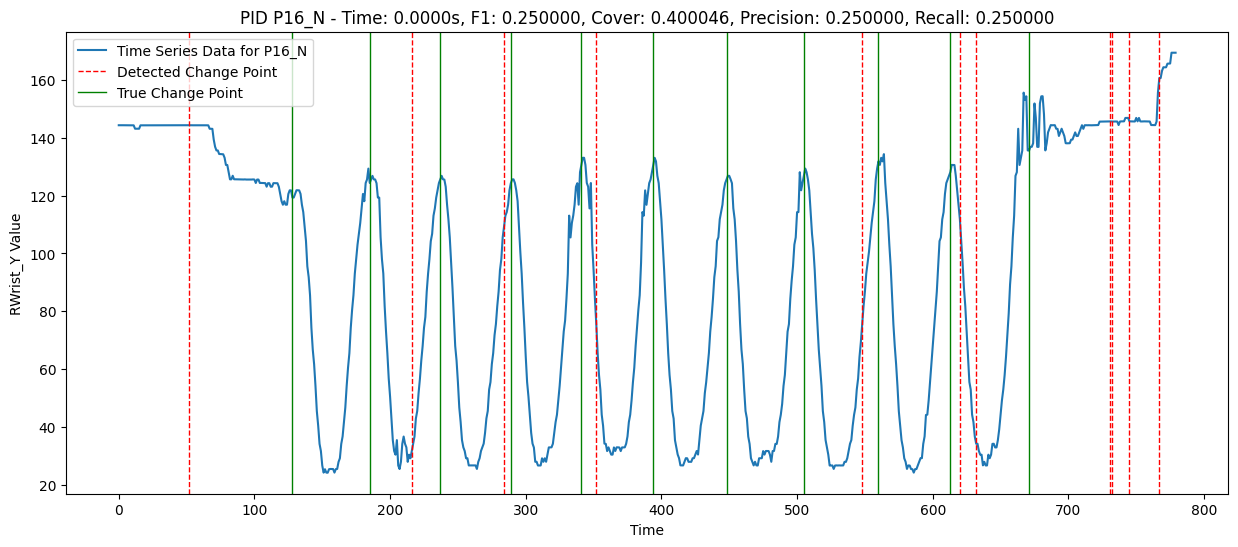

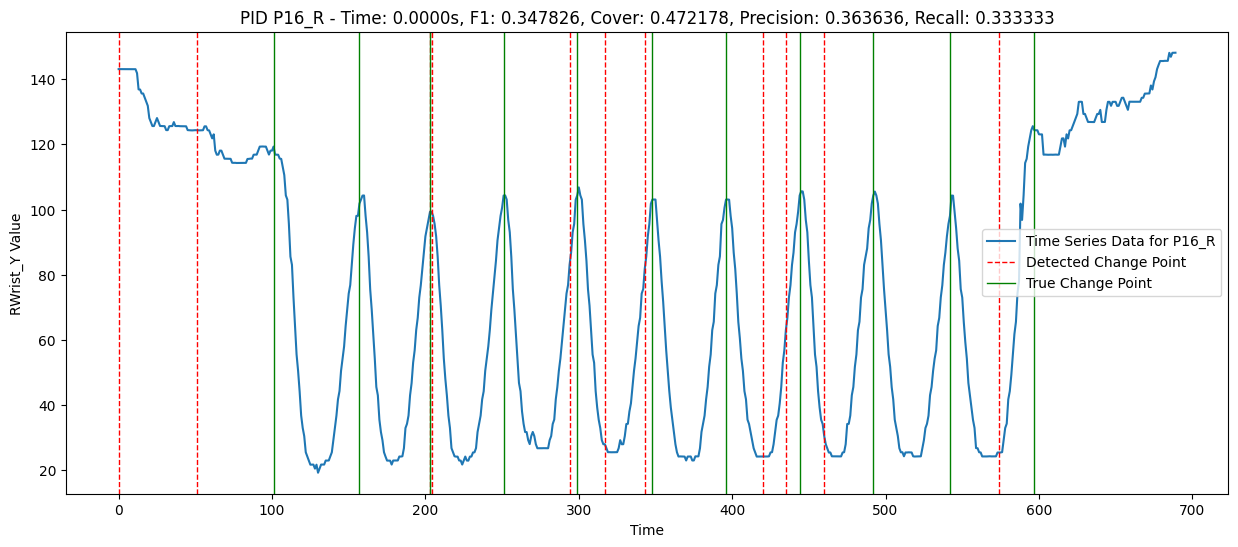

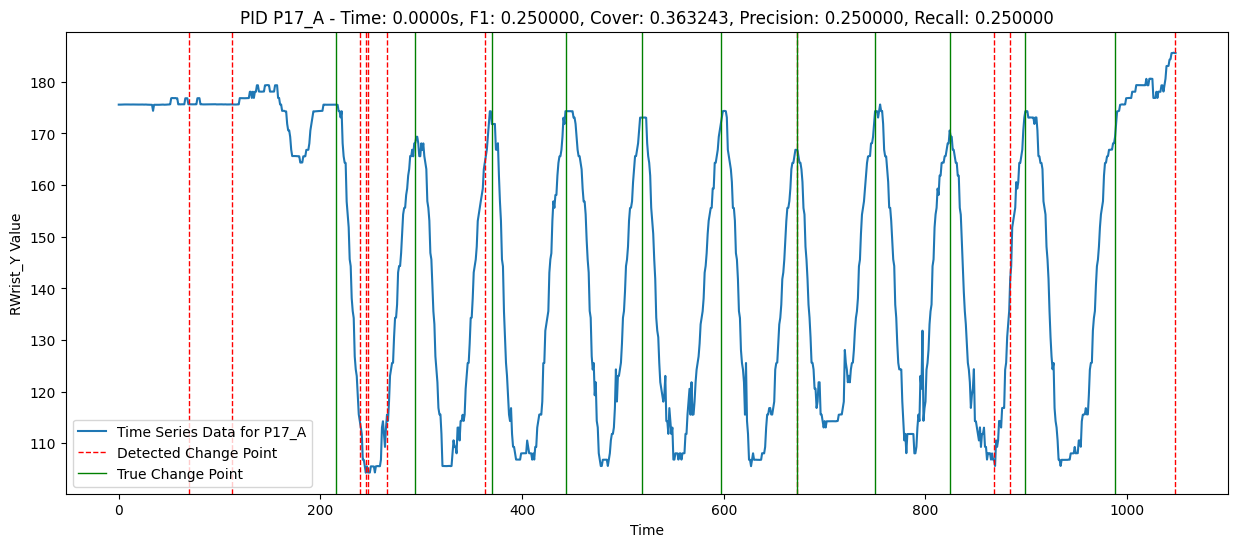

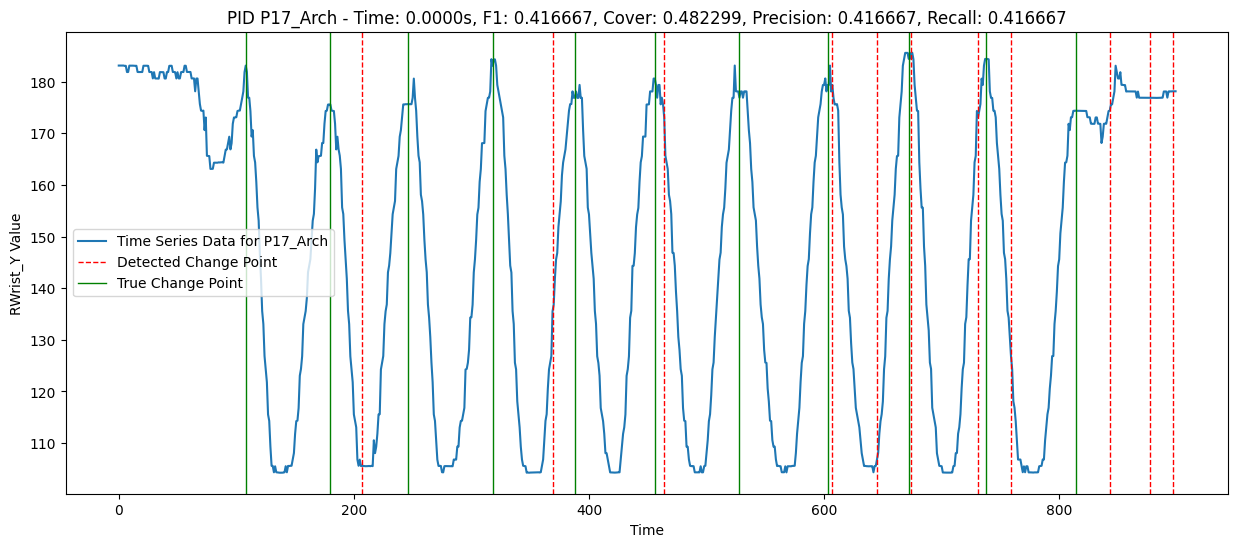

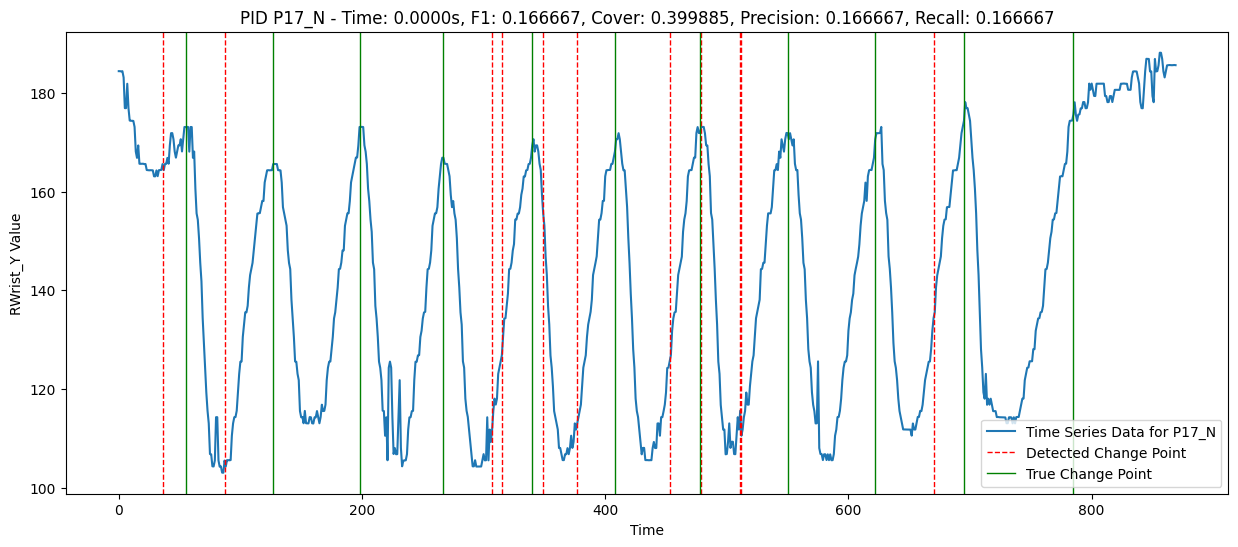

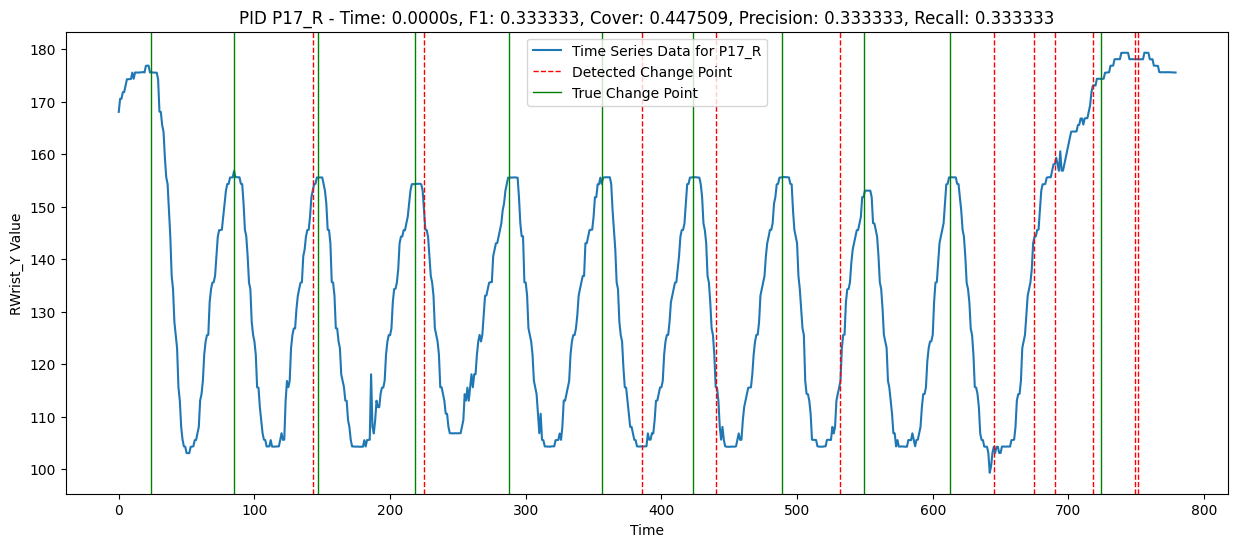

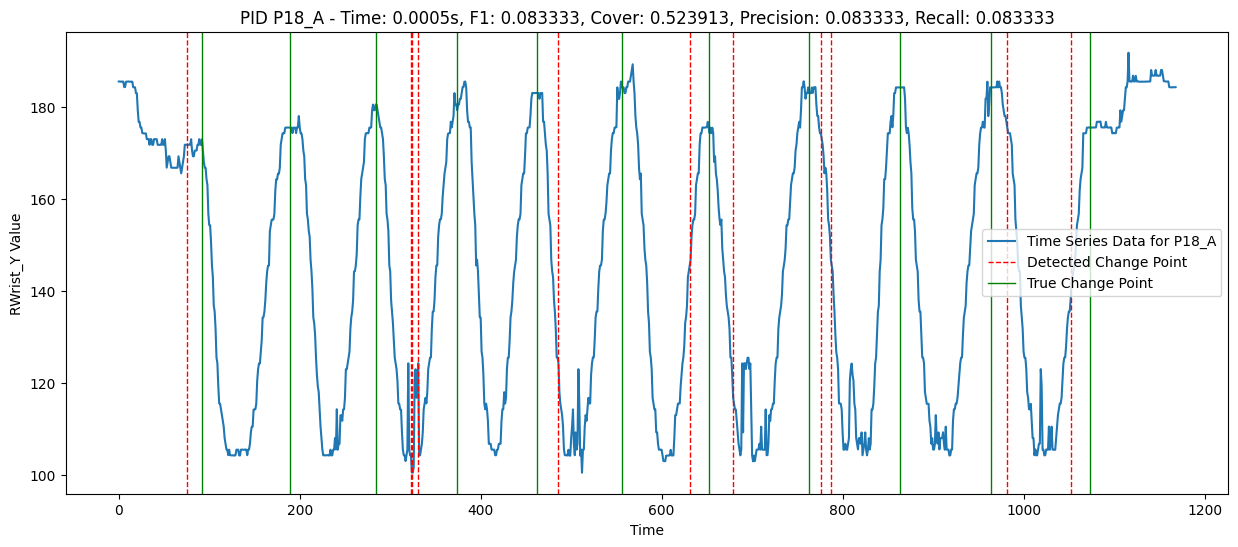

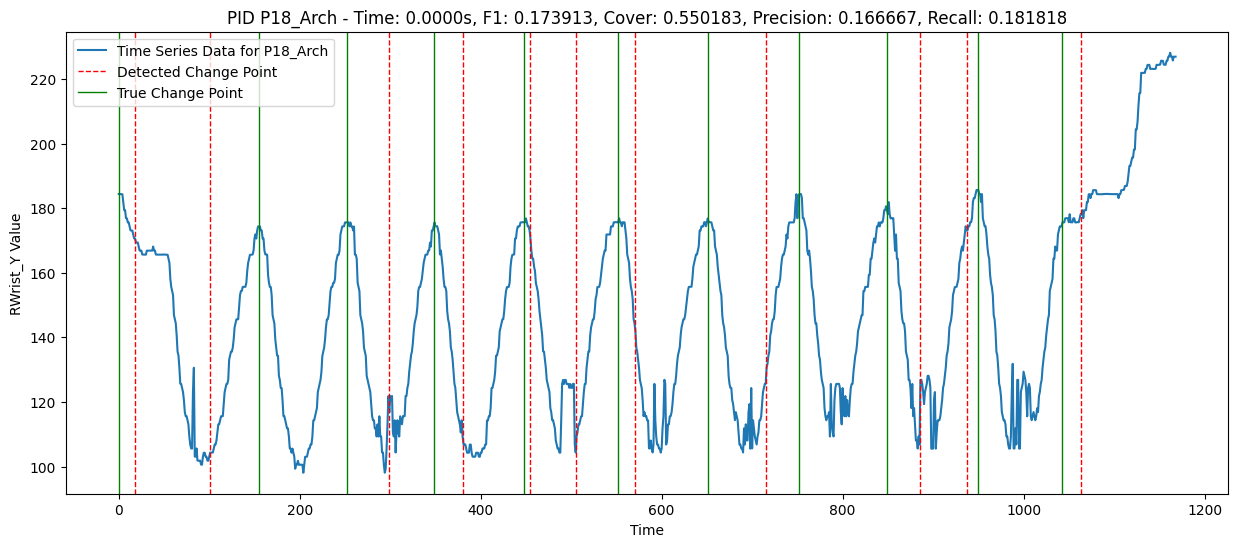

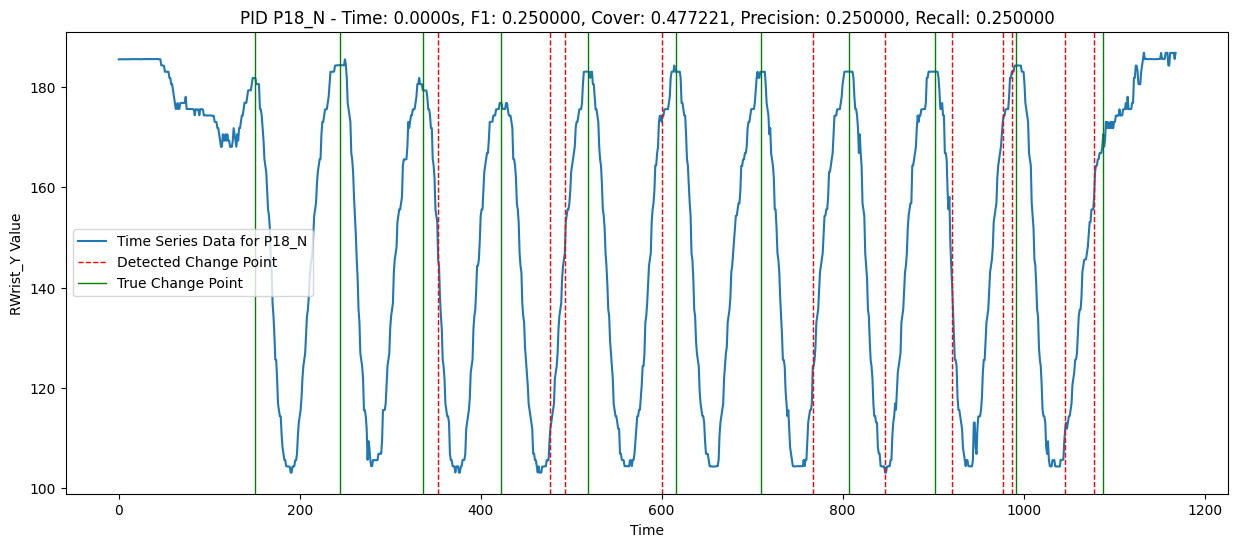

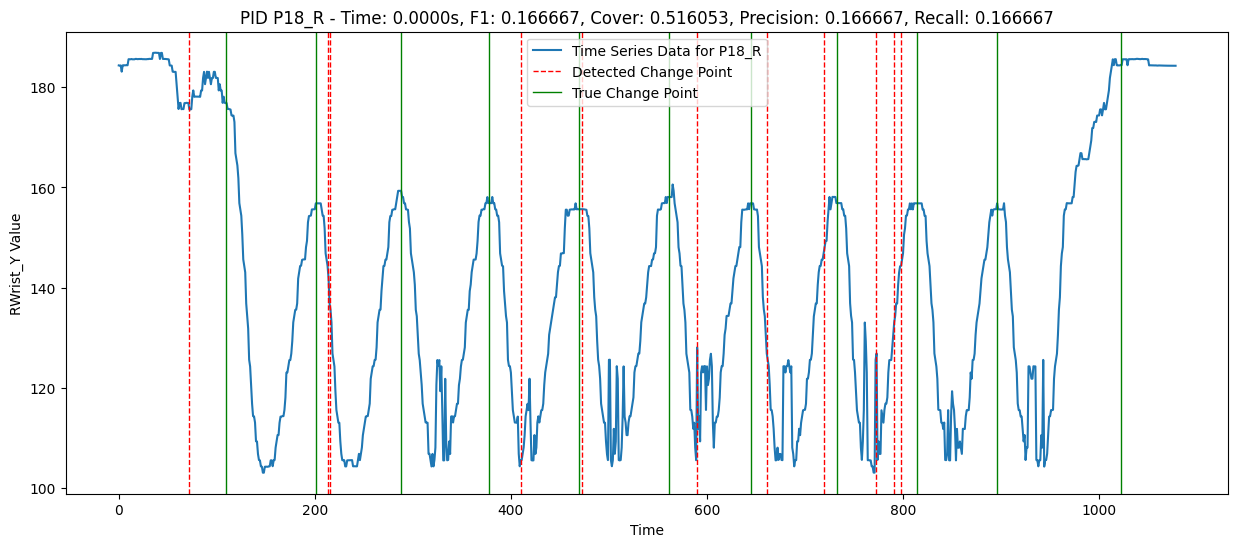

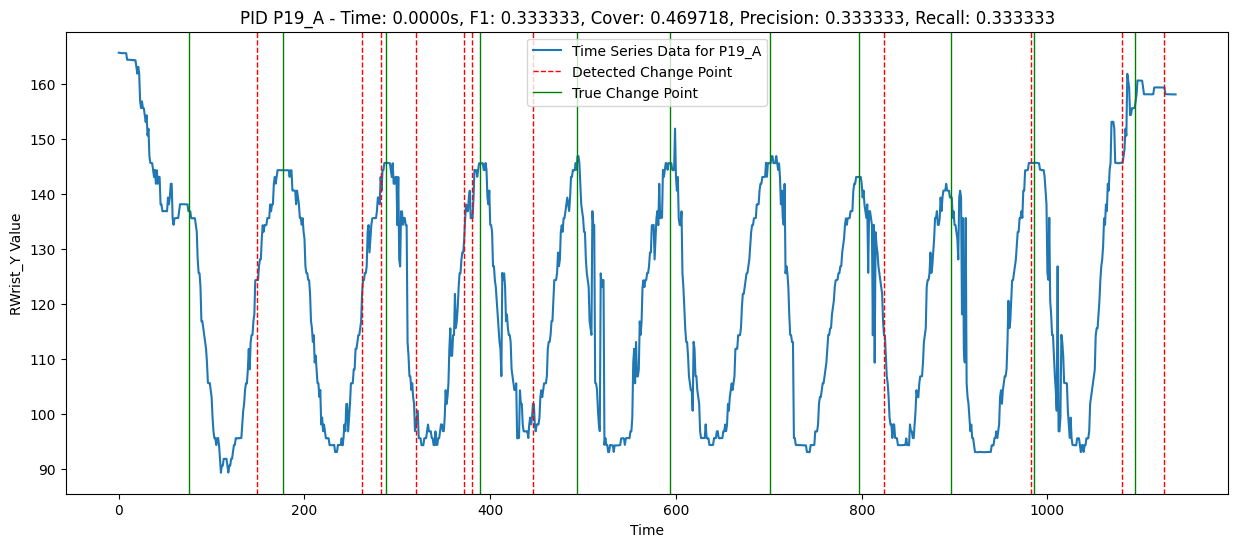

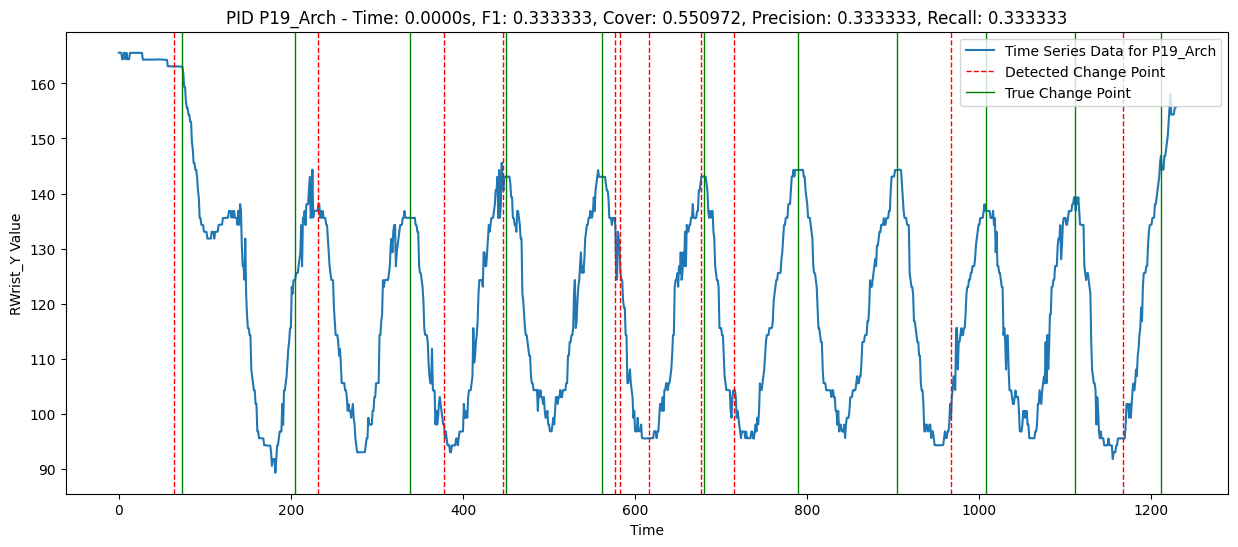

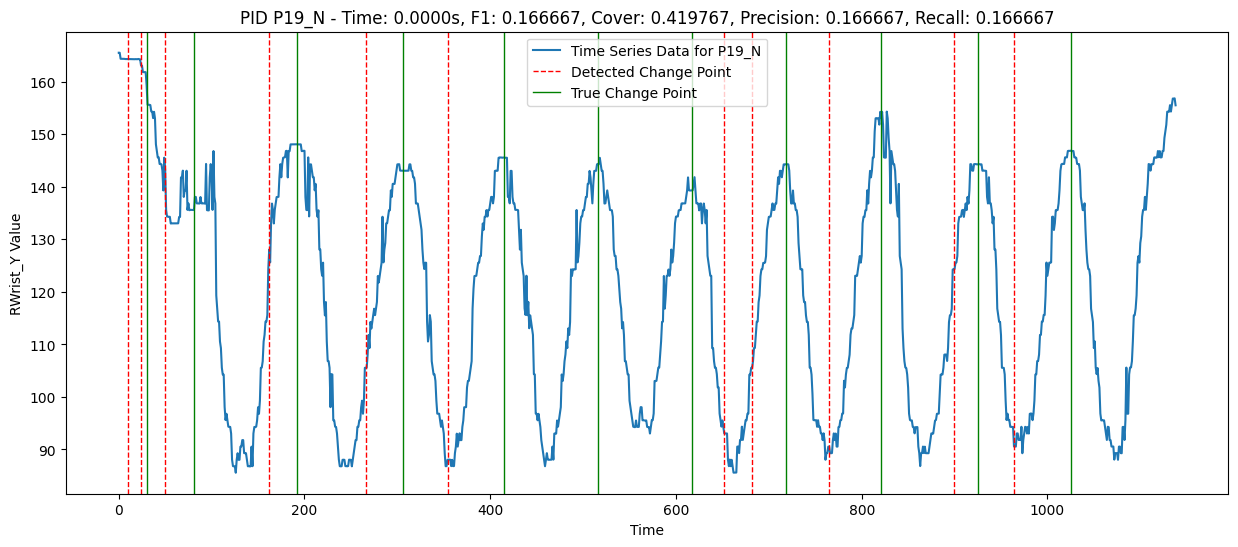

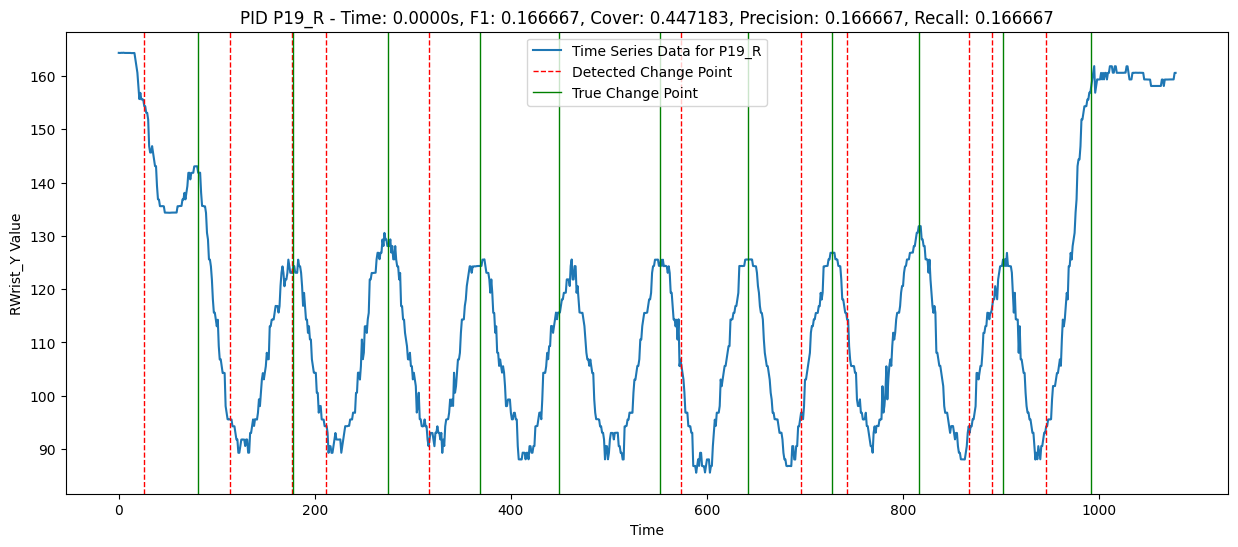

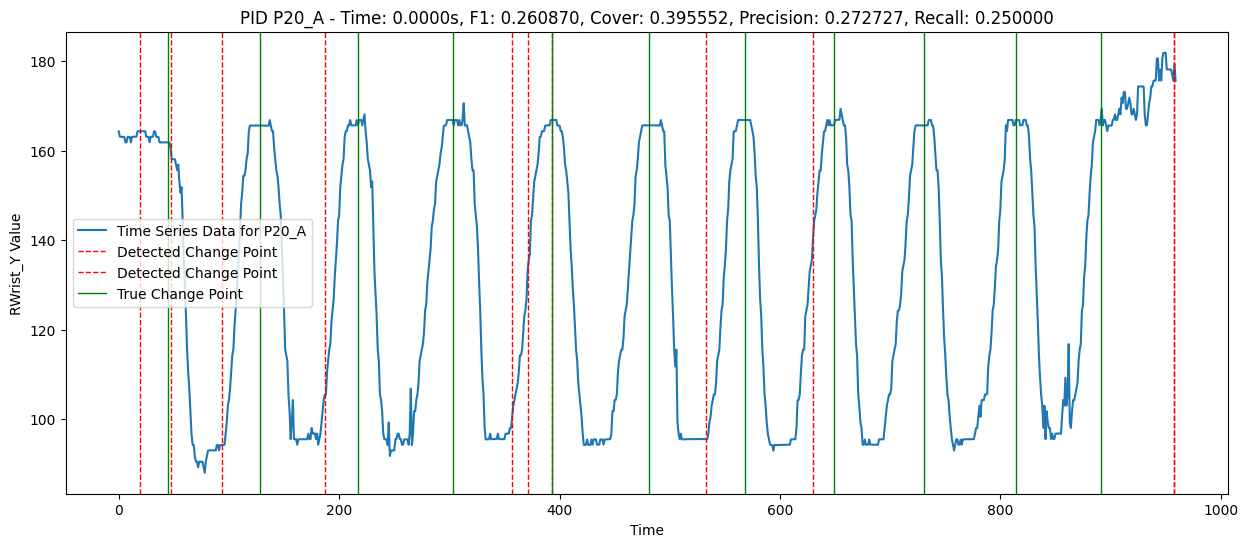

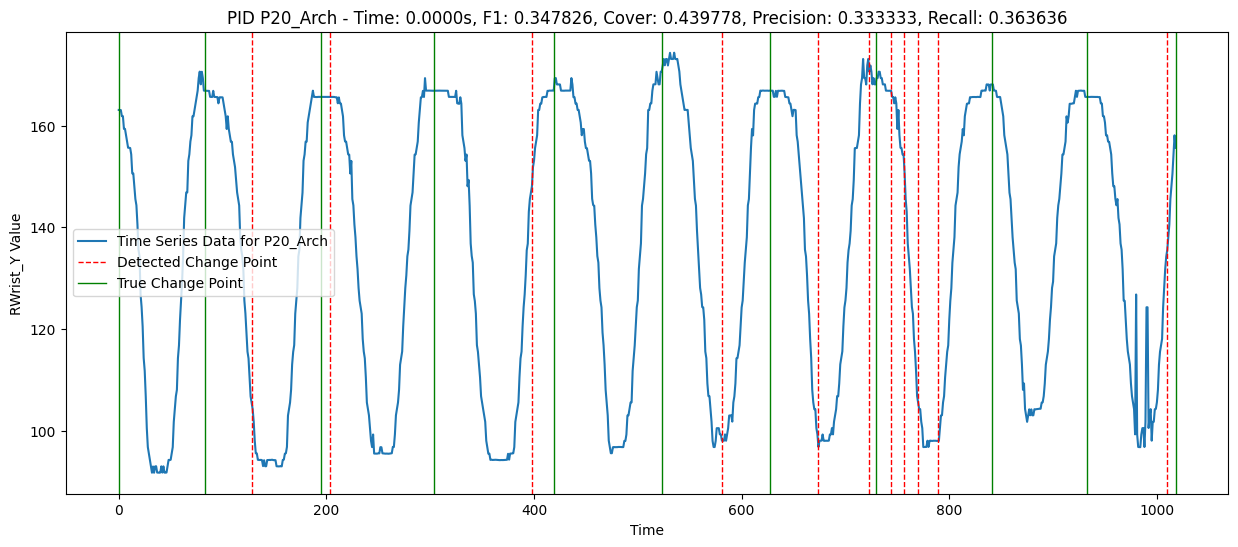

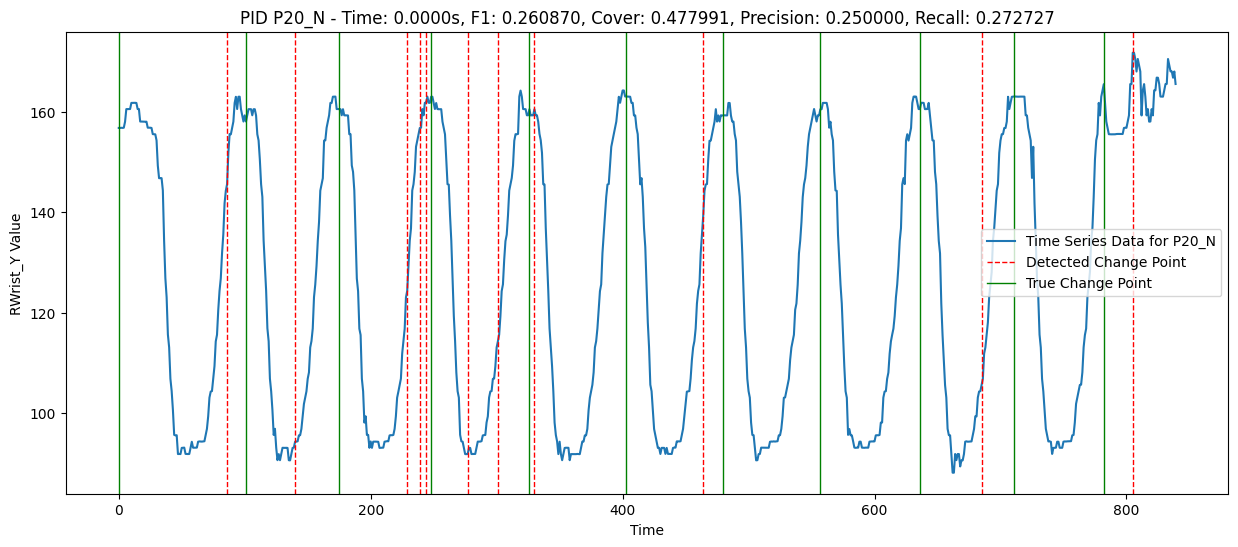

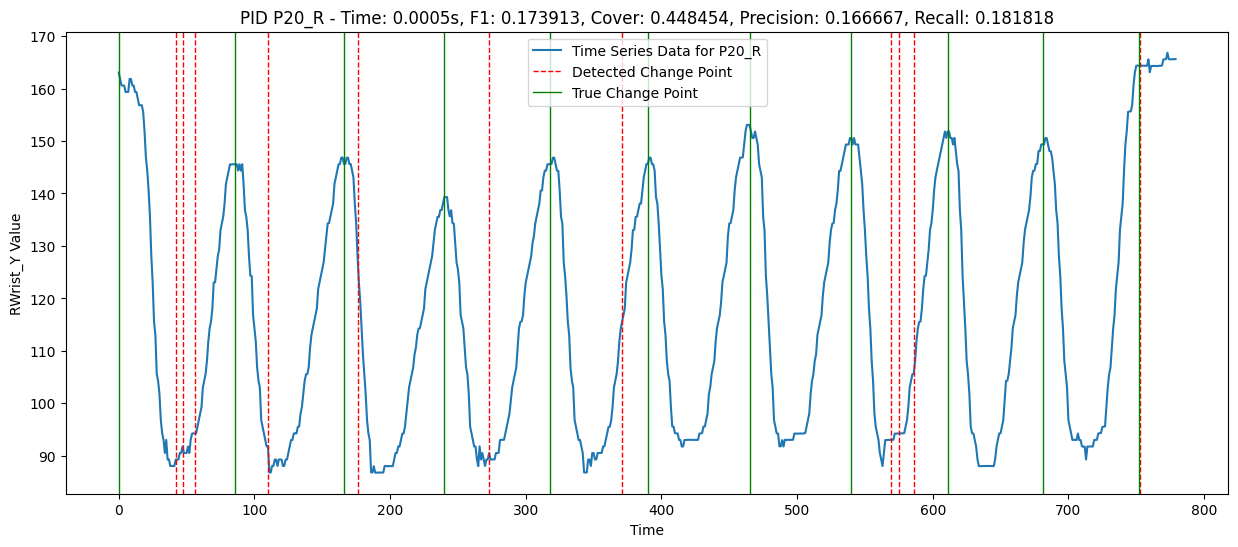

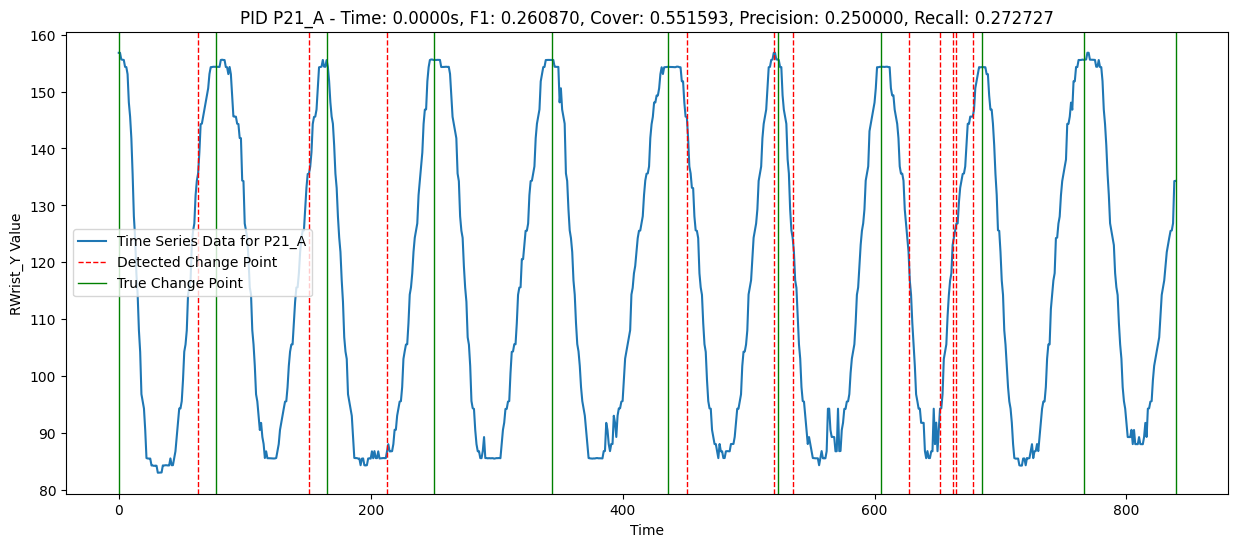

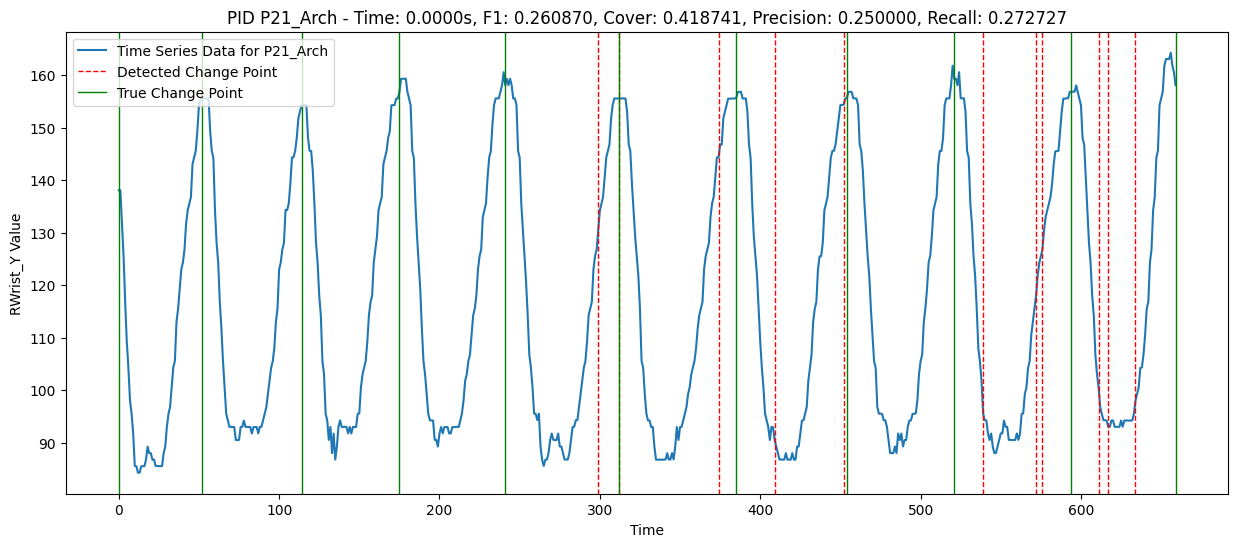

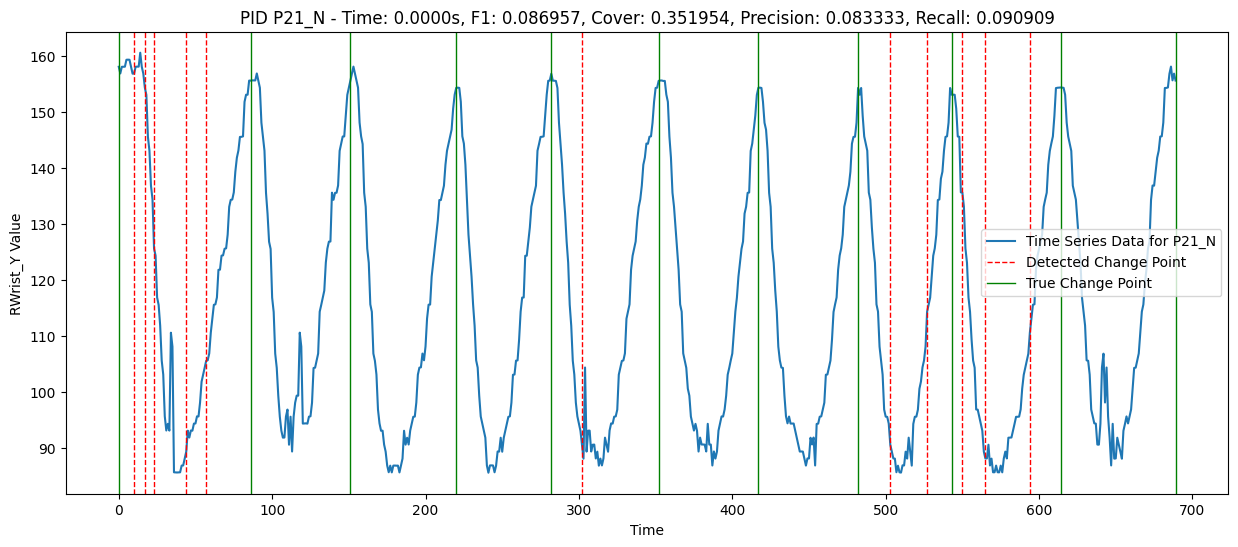

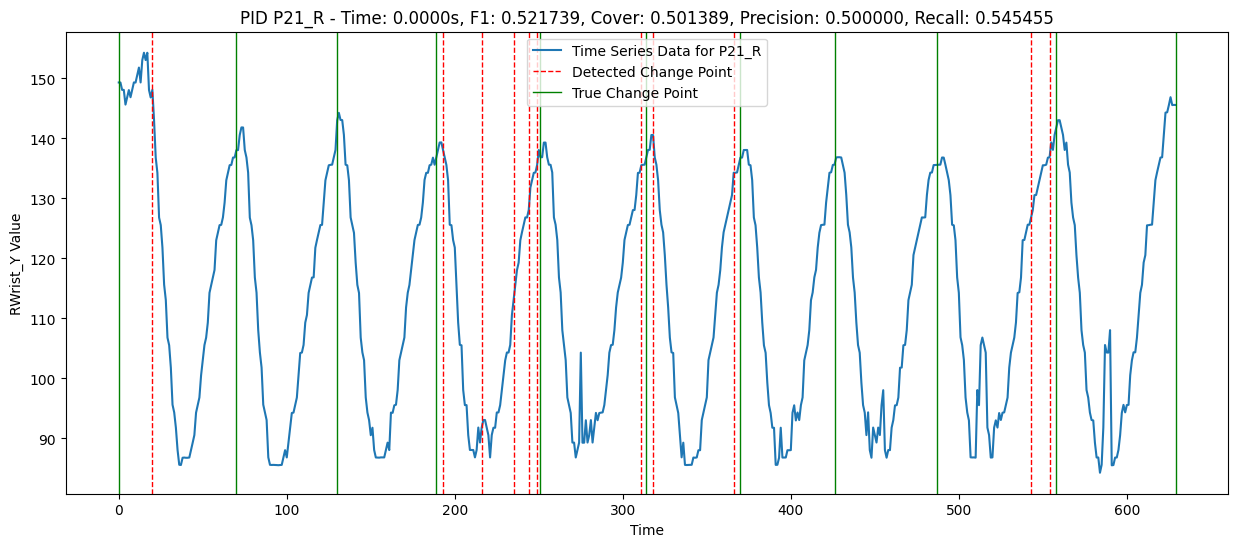

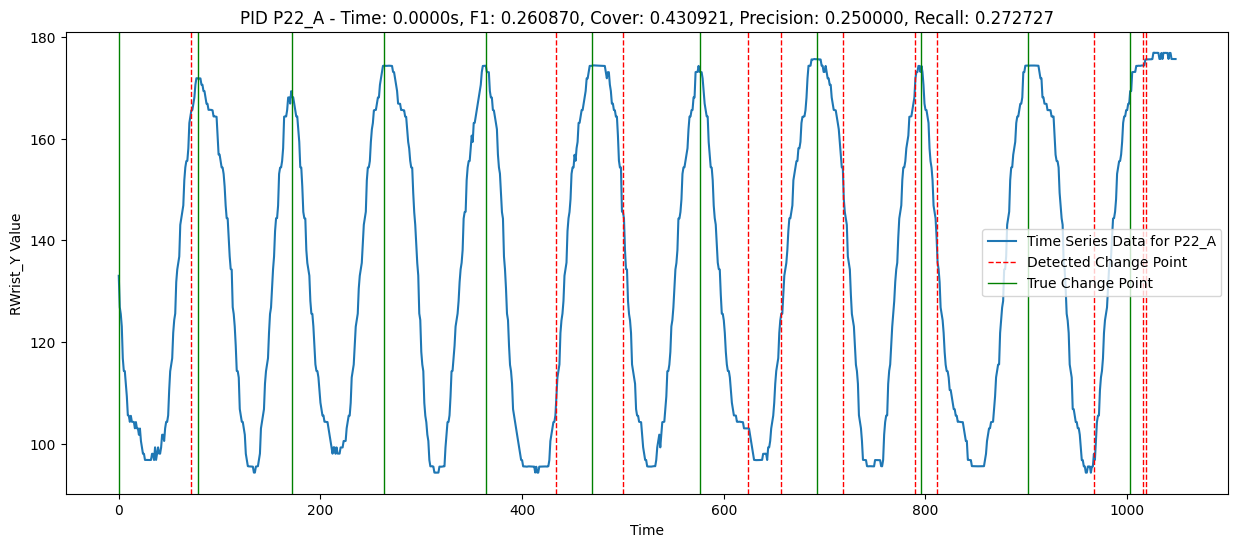

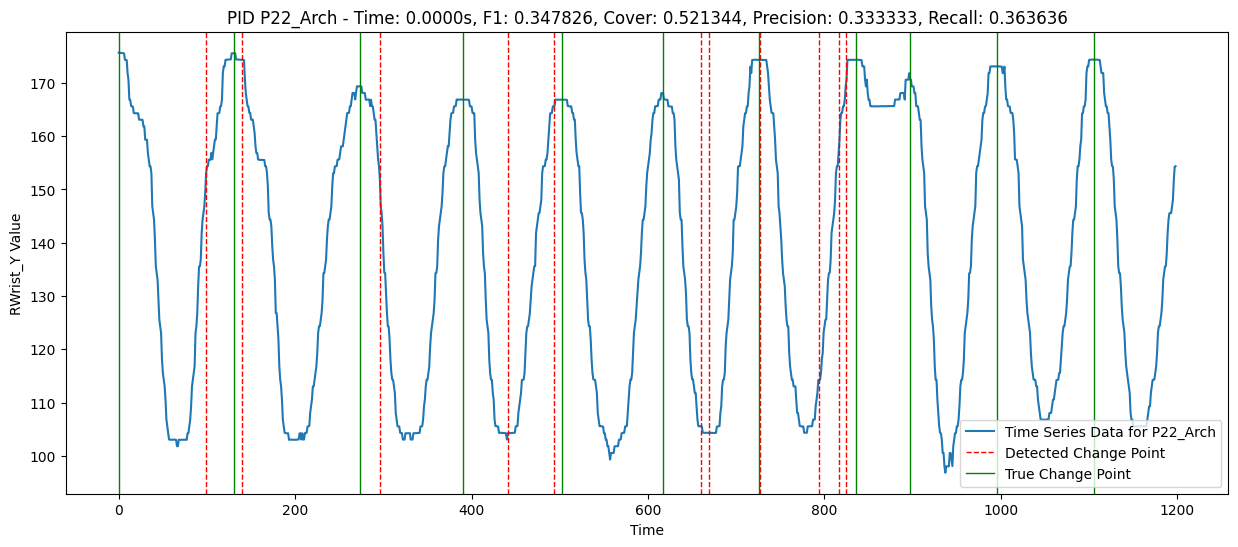

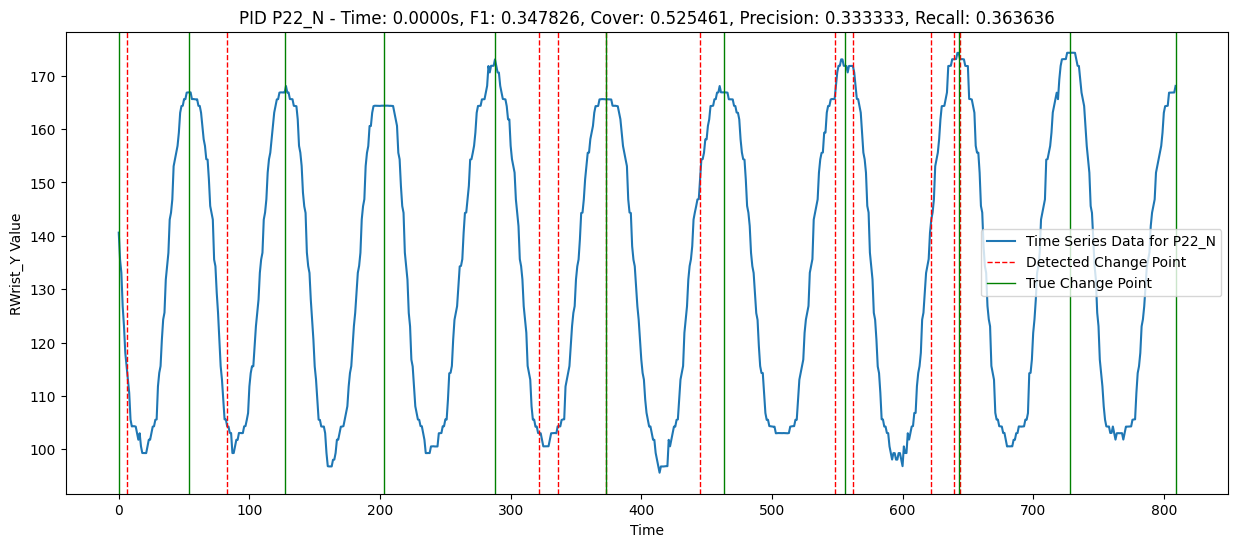

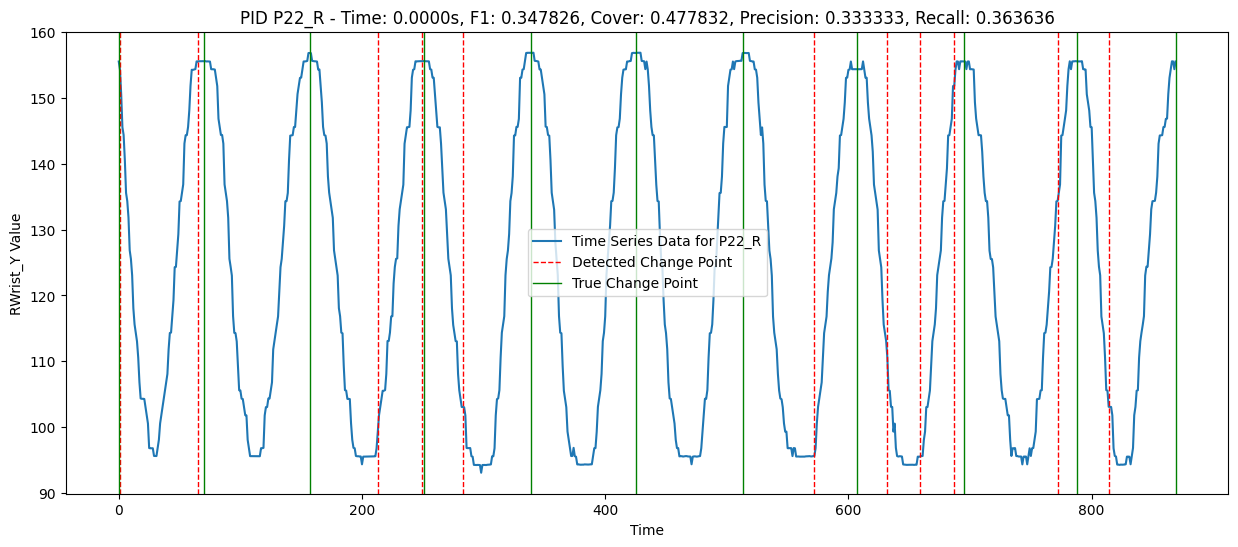

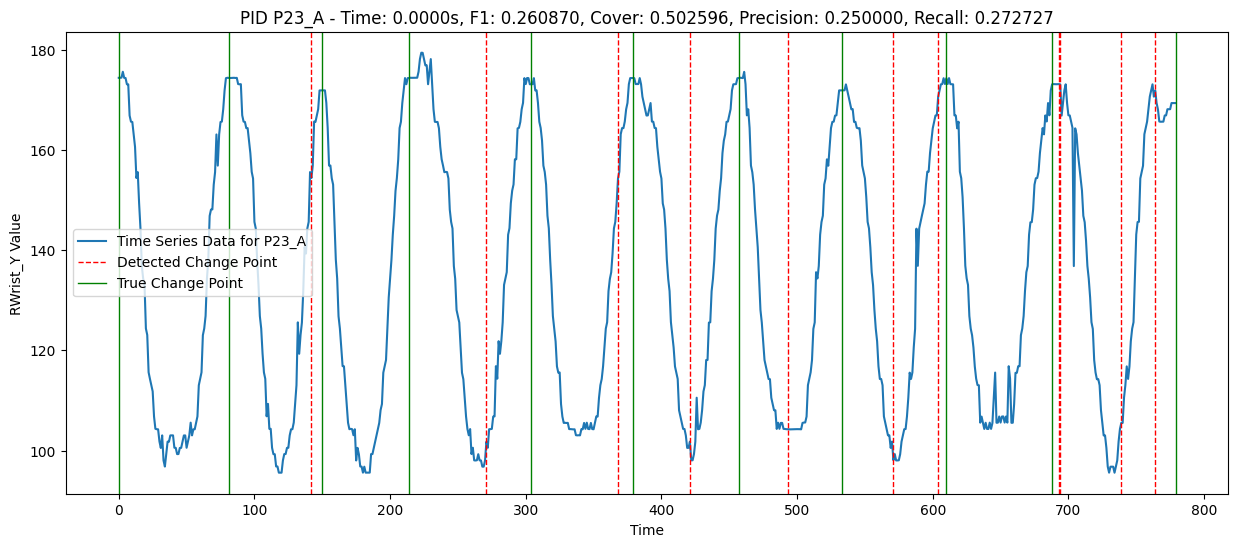

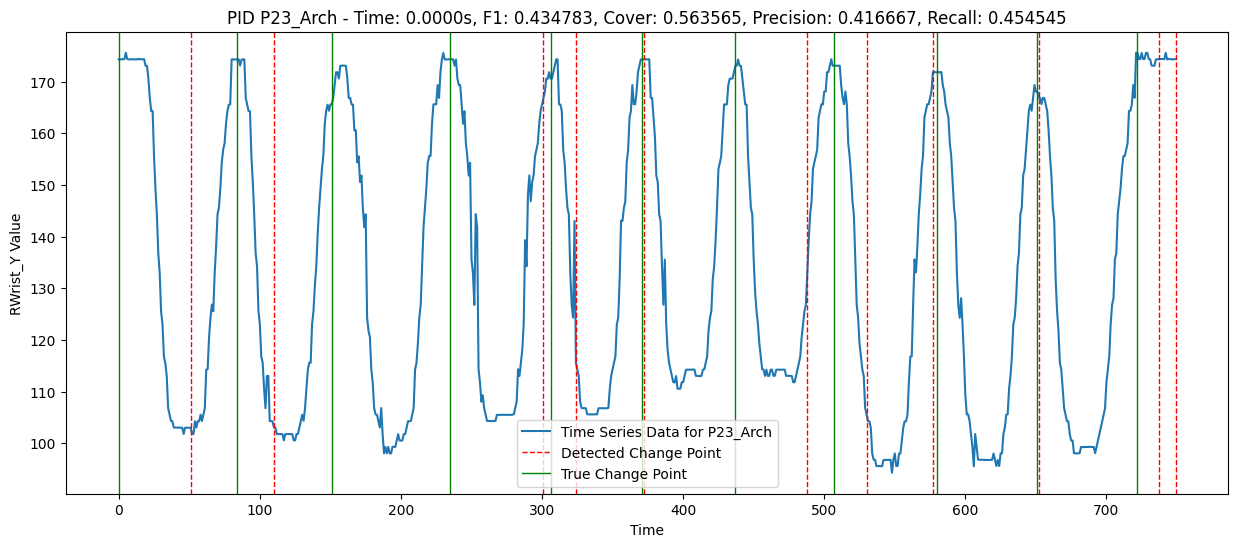

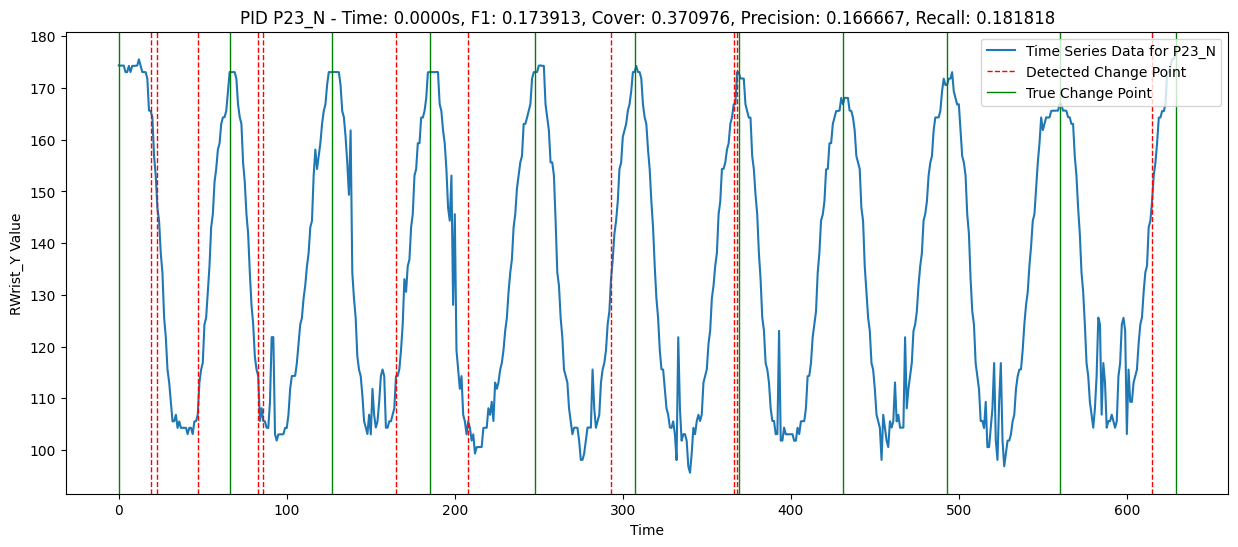

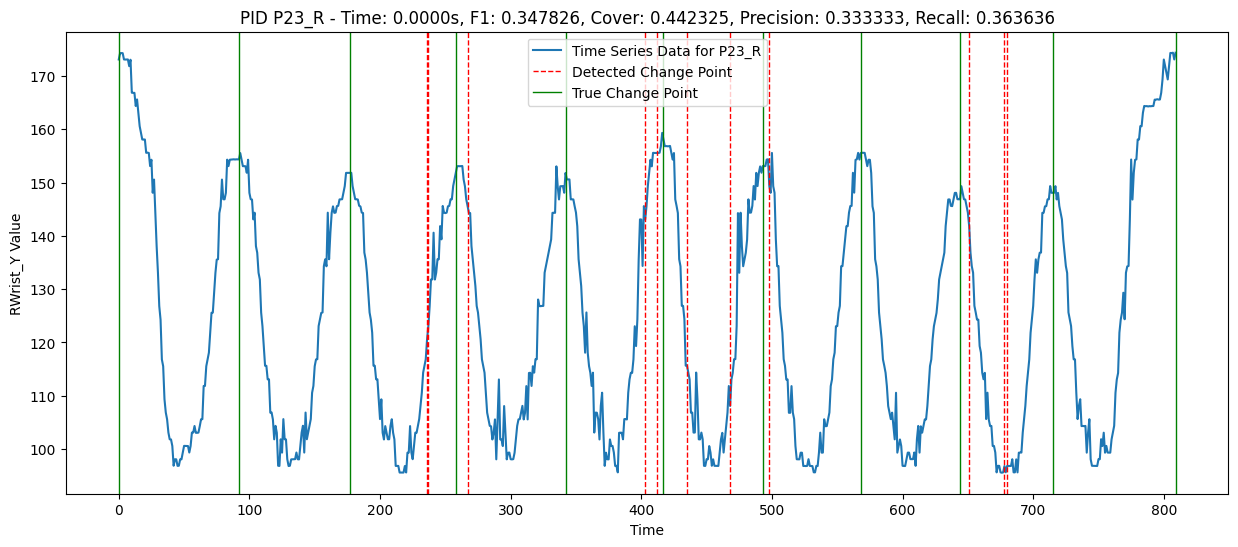

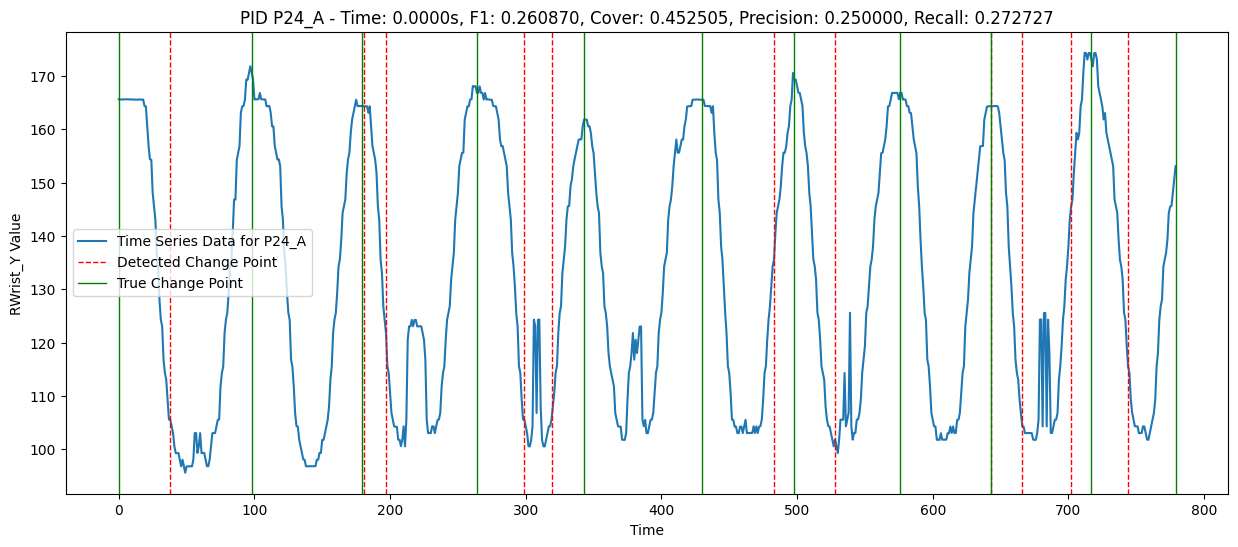

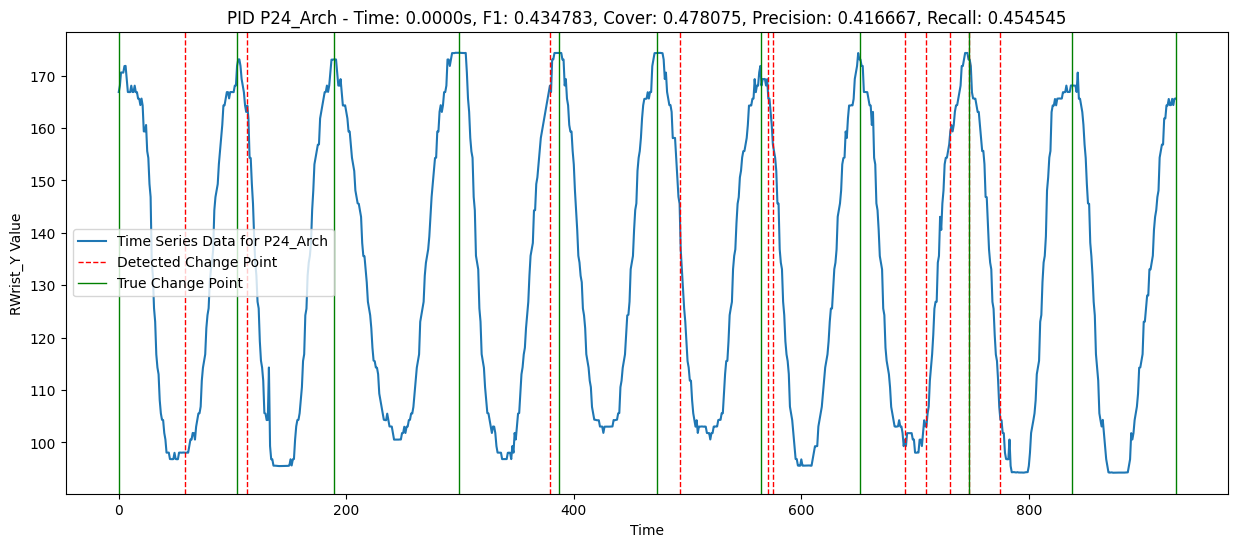

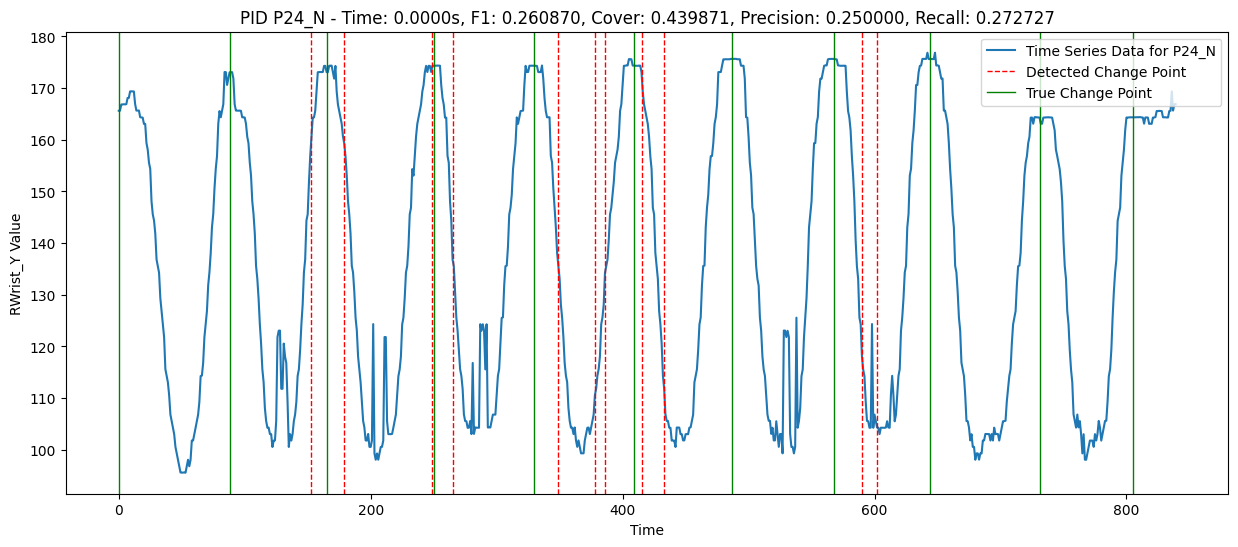

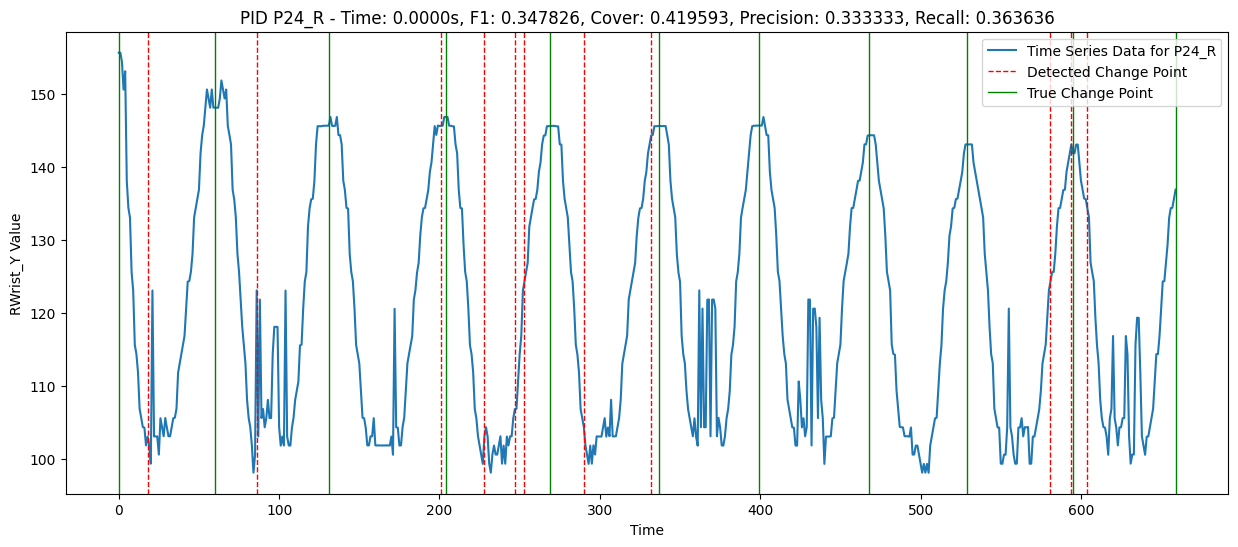

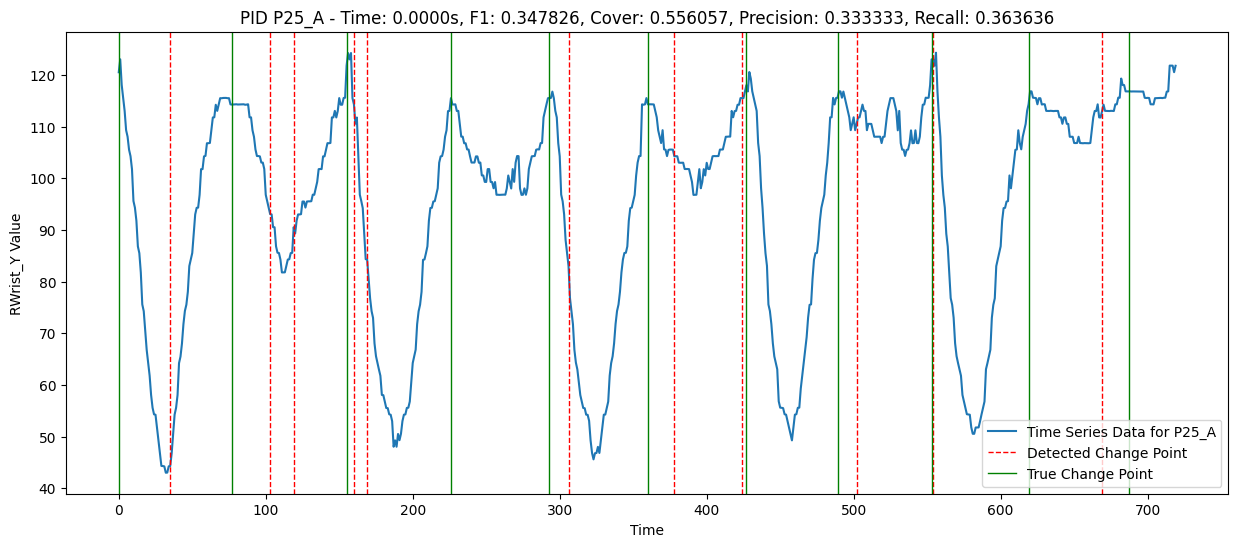

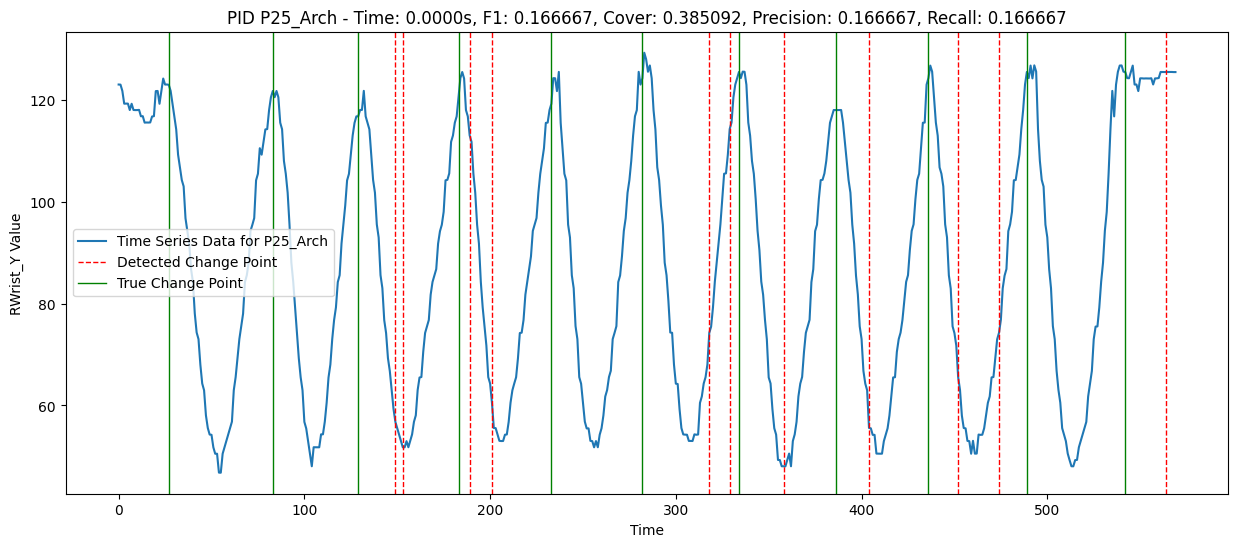

KeyboardInterrupt: 

: 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load CSV data
csv_file = '..//Data//Physio//OpenPose-RightWristWithoutSegmentation-full_df.csv'
df = pd.read_csv(csv_file)

total_time = 0
total_covering = 0
total_f1 = 0
total_precision = 0
total_recall = 0
num_pids = 0

f1_scores = []
precision_scores = []
recall_scores = []
execution_times = []
coverages = []
evaluation_results = []

for pid, group in df.groupby("pid"):
    result = process_plot_evaluate_pid_random(group, pid)
    evaluation_results.append(result)
    total_time += result[-3]
    total_covering += result[-4]
    total_f1 += result[-5]
    total_precision += result[-2]
    total_recall += result[-1]
    num_pids += 1
    execution_times.append(result[-3])
    coverages.append(result[-4])
    f1_scores.append(result[-5])
    precision_scores.append(result[-2])
    recall_scores.append(result[-1])

average_time = total_time / num_pids
average_covering = total_covering / num_pids
average_precision = total_precision / num_pids
average_recall = total_recall / num_pids
average_f1 = 2 * ((average_precision * average_recall) / (average_precision + average_recall))

# Define the directory path for results in the Random folder

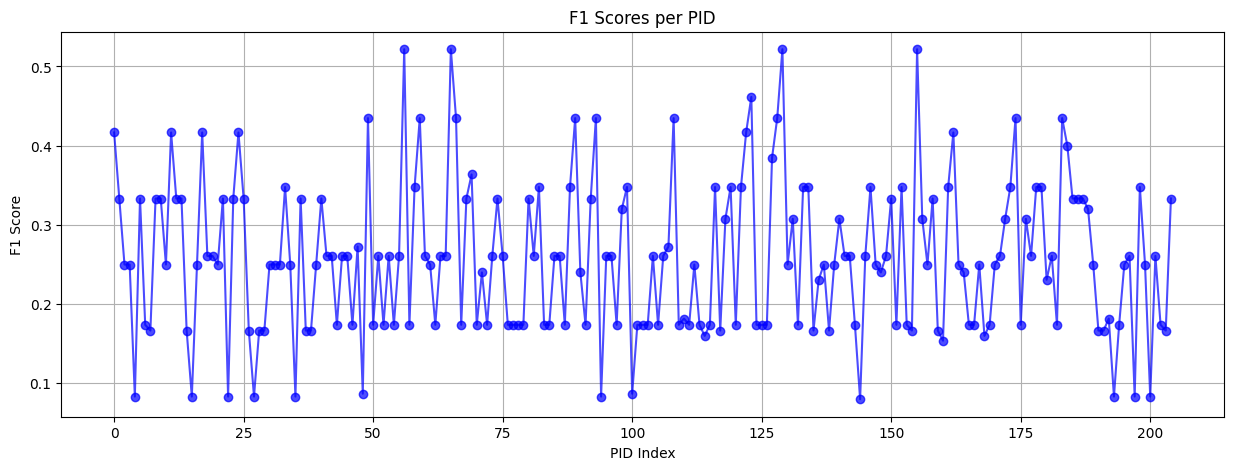

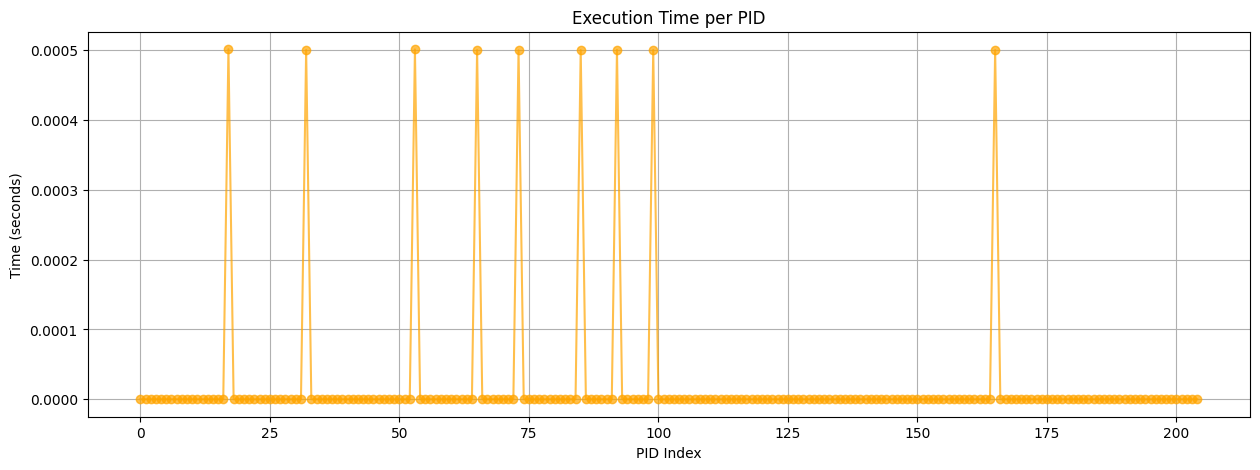

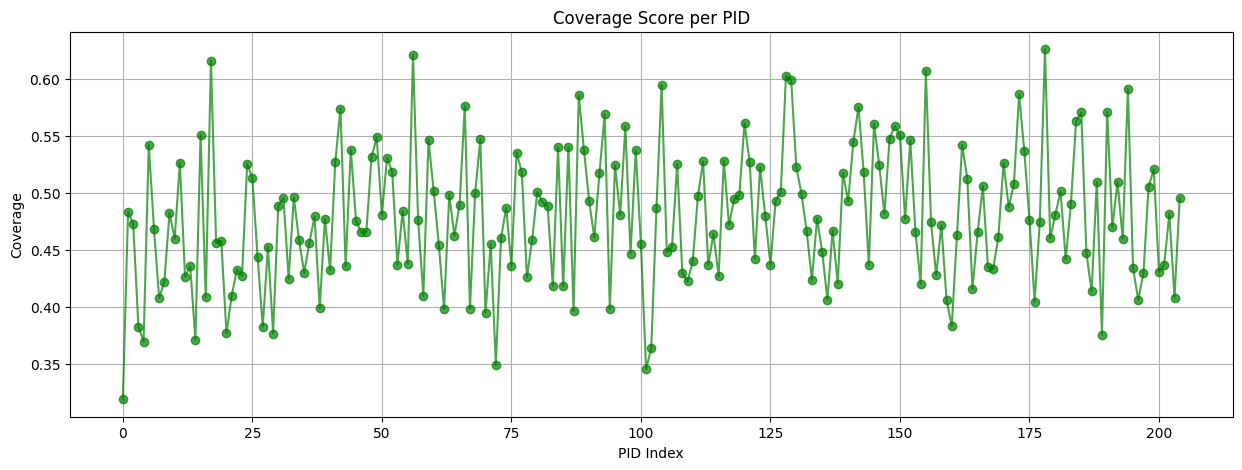

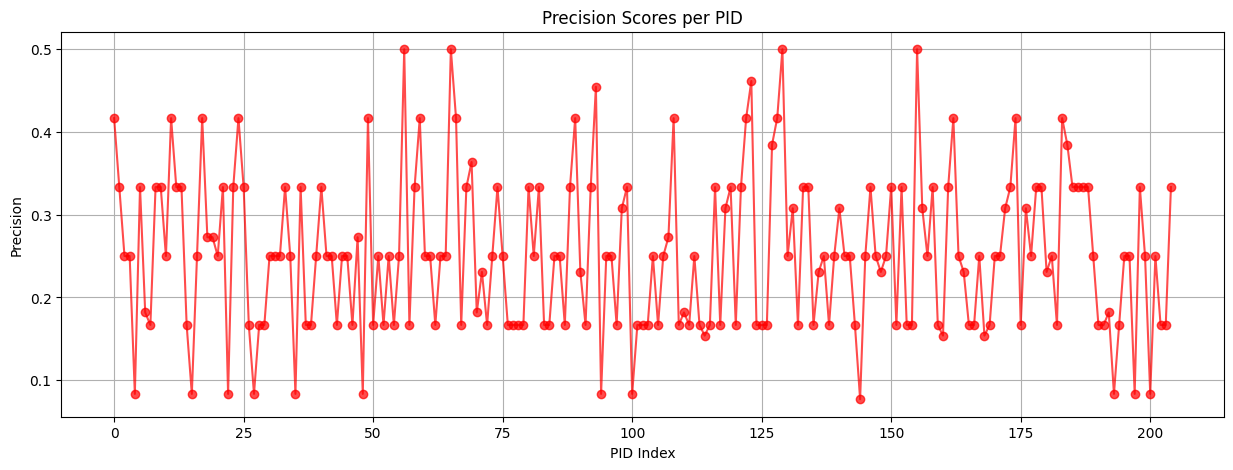

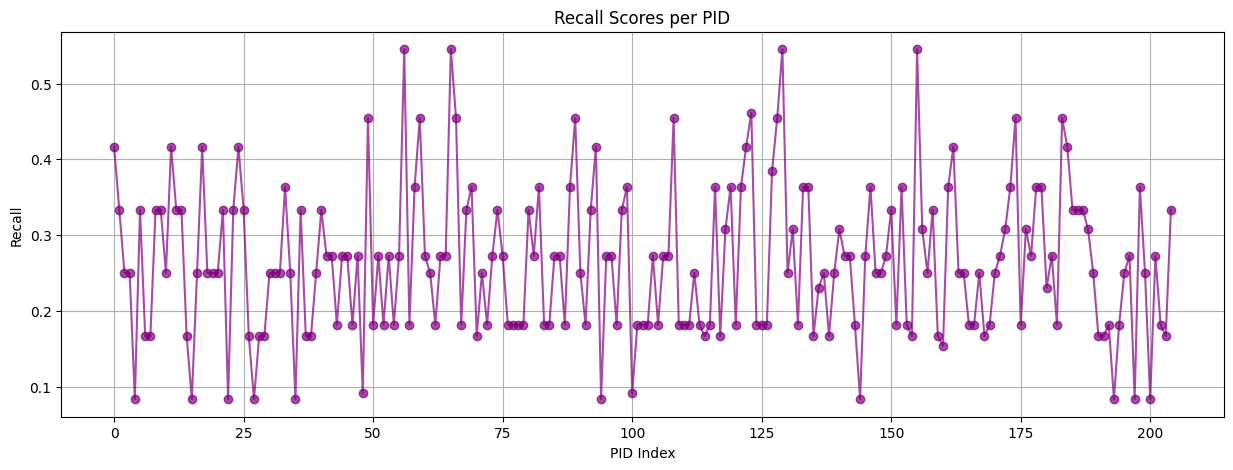

Average Time: 0.0000s, Average Coverage: 0.478290, Average F1 Score: 0.258061, Average Precision: 0.252573, Average Recall: 0.263793


In [16]:
# F1 Scores
plt.figure(figsize=(15, 5))
plt.plot(f1_scores, marker='o', linestyle='-', color='blue', alpha=0.7, label='F1 Score')
plt.title('F1 Scores per PID', fontsize=12)
plt.xlabel('PID Index')
plt.ylabel('F1 Score')
plt.grid(True)
plt.show()

# Execution Times
plt.figure(figsize=(15, 5))
plt.plot(execution_times, marker='o', linestyle='-', color='orange', alpha=0.7, label='Execution Time')
plt.title('Execution Time per PID', fontsize=12)
plt.xlabel('PID Index')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.show()

# Coverage Scores
plt.figure(figsize=(15, 5))
plt.plot(coverages, marker='o', linestyle='-', color='green', alpha=0.7, label='Coverage')
plt.title('Coverage Score per PID', fontsize=12)
plt.xlabel('PID Index')
plt.ylabel('Coverage')
plt.grid(True)
plt.show()

# Precision Scores
plt.figure(figsize=(15, 5))
plt.plot(precision_scores, marker='o', linestyle='-', color='red', alpha=0.7, label='Precision')
plt.title('Precision Scores per PID', fontsize=12)
plt.xlabel('PID Index')
plt.ylabel('Precision')
plt.grid(True)
plt.show()

# Recall Scores
plt.figure(figsize=(15, 5))
plt.plot(recall_scores, marker='o', linestyle='-', color='purple', alpha=0.7, label='Recall')
plt.title('Recall Scores per PID', fontsize=12)
plt.xlabel('PID Index')
plt.ylabel('Recall')
plt.grid(True)
plt.show()

# Print averages
print(f'Average Time: {average_time:.4f}s, Average Coverage: {average_covering:.6f}, Average F1 Score: {average_f1:.6f}, Average Precision: {average_precision:.6f}, Average Recall: {average_recall:.6f}')